### Compile Vectors

In [1]:
from utils.dataCompilation import compileVectors

compileVectors()

1989
	7290 disease vectors
	26028 chemical vectors
2019
	9203 disease vectors
	75645 chemical vectors


## Test 1 - CTD DDAs

Question: Can we predict the type of DDA from the Pubmed Vectors? <br>
Approach: Train different models on the CTD dataset of classified DDAs and observe the test accuracy

Compile CTD DDAs

In [28]:
from utils.dataCompilation import compileCTDDDAs

compileCTDDDAs(['concat', 'mean', 'append'])

33536 marker associations
18659 therapeutic associations


### SVC

In [ ]:
from utils.dataLoading import loadCTDDDAs
from utils.training import trainLCF

X_pos, X_neg = loadCTDDDAs()
for dataType in ['mean', 'concat']:
    trainLCF(X_pos, X_neg, 'CTDDDAs', dataType)

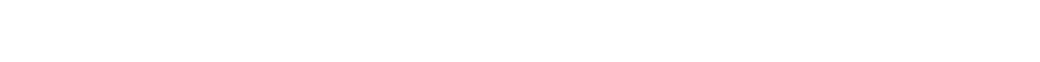

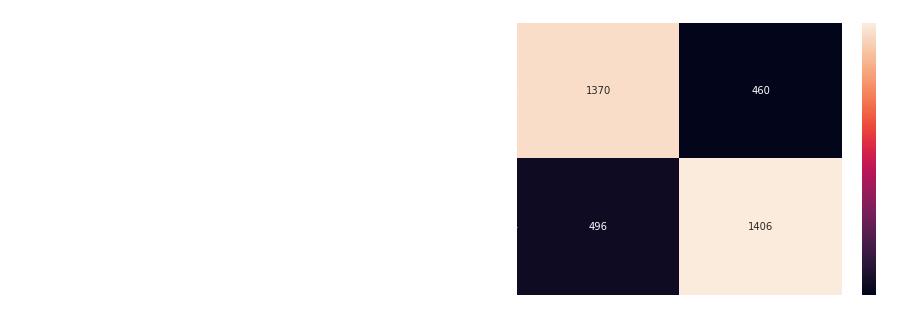

In [2]:
from utils.plotting import analyzeClassifier
from utils.modelHandling import loadClassifierHistories

analyzeClassifier('LCF - CTD DDAs', loadClassifierHistories('lcf', 'CTDDDAs', 'concat'))

### ANN

In [ ]:
from utils.dataLoading import loadCTDDDAs
from utils.training import trainANN

for dataType in ['mean', 'concat', 'append']:
    print(dataType)
    
    X_pos, X_neg = loadCTDDDAs(dataType)
    trainANN(X_pos, X_neg, 'CTDDDAs', dataType)

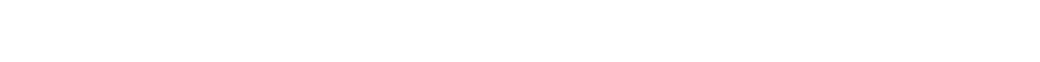

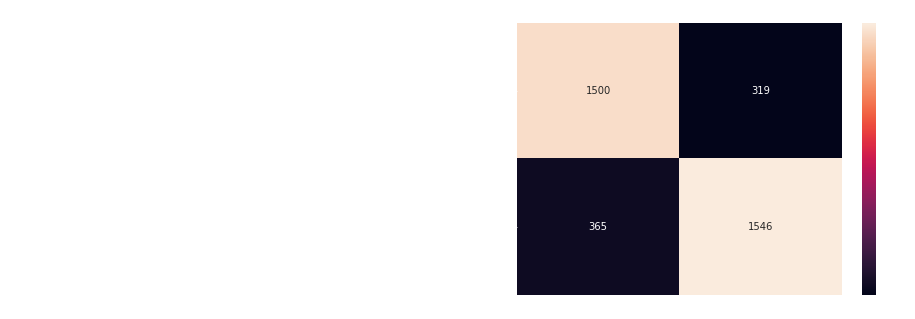

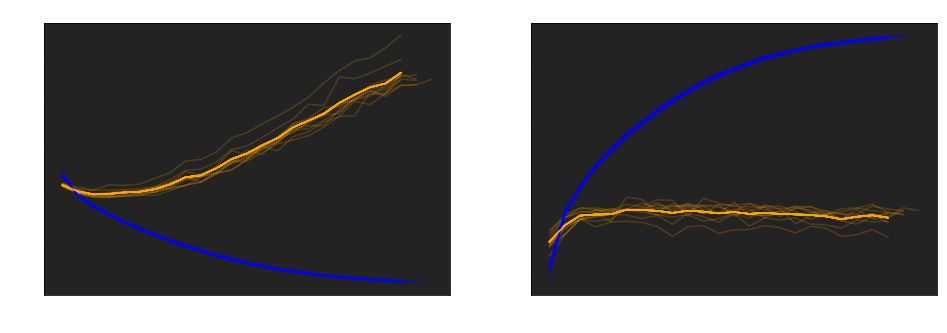

In [3]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('ANN - CTD DDAs', loadNetworkHistories('ann', 'CTDDDAs', 'concat'))

### CNN

In [ ]:
from utils.dataLoading import loadCTDDDAs
from utils.training import trainCNN

for dataType in ['mean', 'concat', 'append']:
    print(dataType)
    
    X_pos, X_neg = loadCTDDDAs(dataType)
    trainCNN(X_pos, X_neg, 'CTDDDAs', dataType)

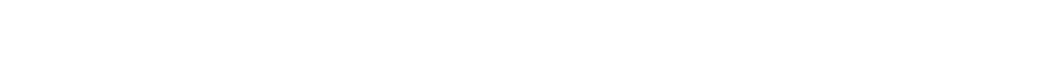

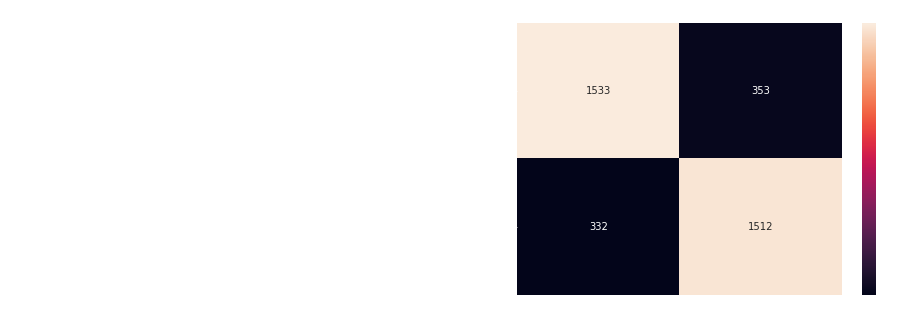

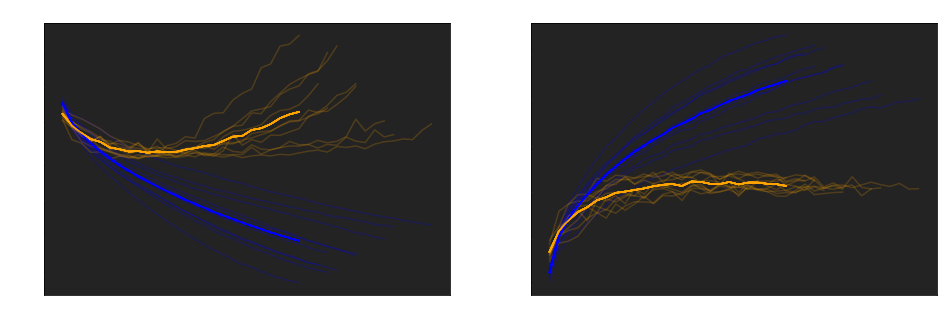

In [24]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('CNN - CTD DDAs', loadNetworkHistories('cnn', 'CTDDDAs', 'concat'))

### Analyze

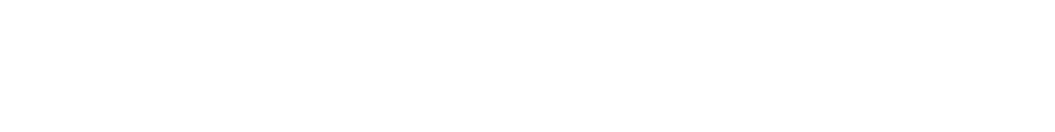

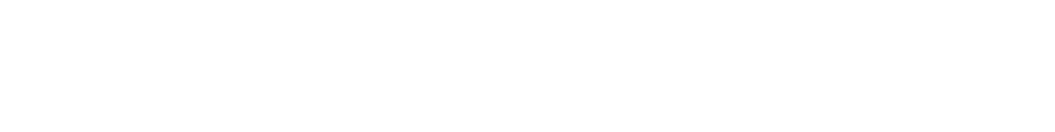

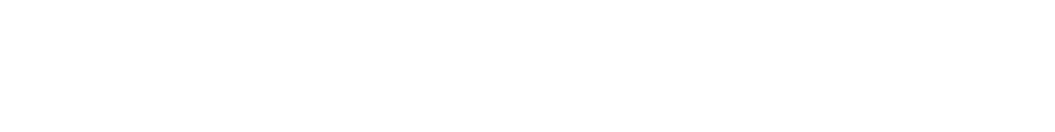

In [22]:
from utils.modelHandling import loadNetworkHistories, loadClassifierHistories
from utils.plotting import getAvgMaxNetworkAccuracy, getAvgClassifierAccuracy, compareModels

compareModels('LCF', 'data type', ['mean', 'concat'], 
                   [getAvgClassifierAccuracy(loadClassifierHistories('lcf', 'CTDDDAs', dataType)) for dataType in ['mean', 'concat']])

compareModels('ANN', 'data type', ['mean', 'concat'],
              [getAvgMaxNetworkAccuracy(loadNetworkHistories('ann', f'CTDDDAs', dataType)) for dataType in ['mean', 'concat']])

compareModels('CNN', 'data type', ['mean', 'concat', 'append'],
              [getAvgMaxNetworkAccuracy(loadNetworkHistories('cnn', f'CTDDDAs', dataType)) for dataType in ['mean', 'concat', 'append']])

## Test 2 - Distance

Question: Does the distance between the disease vector and the chemical vector correlate to the Semantic Disambiguation Accuracy? <br>
Approach: Test the SDA for a chemicals and their 10, 20, 50 and 100 nearest disease neighbors.

Compile Predicted DDAs

In [29]:
from utils.dataCompilation import compilePredictedDDAs

compilePredictedDDAs()

5 NDNs
	401 marker associations
	1183 therapeutic associations
	13047 labels missing
10 NDNs
	688 marker associations
	1939 therapeutic associations
	26189 labels missing
20 NDNs
	1172 marker associations
	3044 therapeutic associations
	51060 labels missing
50 NDNs
	2264 marker associations
	4812 therapeutic associations
	114382 labels missing
100 NDNs
	3322 marker associations
	6232 therapeutic associations
	189456 labels missing
Adaptive NDNs
	1752 marker associations
	3569 therapeutic associations
	28792 labels missing


### LCF

In [ ]:
from utils.dataLoading import loadPredictedDDAs
from utils.training import trainLCF

for NDNs in ['10', '20', '50', '100', 'Adaptive']:
    print(f'\n{NDNs} NDNs')
    X_pos, X_neg = loadPredictedDDAs(NDNs)
    
    trainLCF(X_pos, X_neg, f'predictedDDAs-{NDNs}NDNs', numSamples=688)

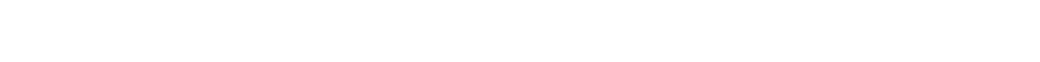

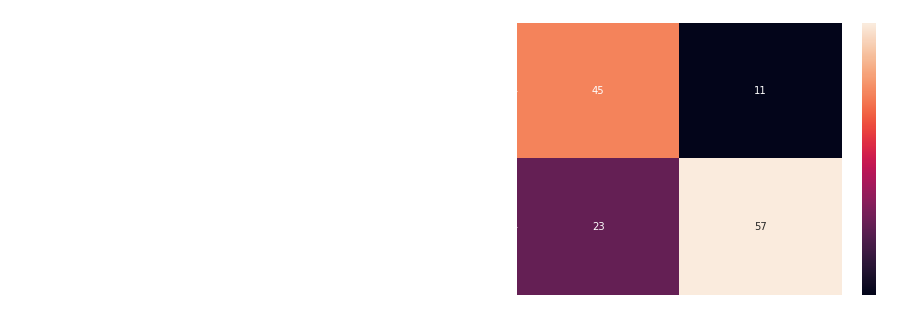

In [4]:
from utils.plotting import analyzeClassifier
from utils.modelHandling import loadClassifierHistories

analyzeClassifier('LCF - Predicted DDAs', loadClassifierHistories('lcf', 'predictedDDAs-AdaptiveNDNs'))

### ANN

In [ ]:
from utils.dataLoading import loadPredictedDDAs
from utils.training import trainANN

for NDNs in ['10', '20', '50', '100', 'Adaptive']:
    print(f'\n{NDNs} NDNs')
    X_pos, X_neg = loadPredictedDDAs(NDNs)
    
    trainANN(X_pos, X_neg, f'predictedDDAs-{NDNs}NDNs', numSamples=688)

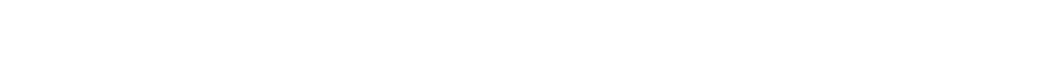

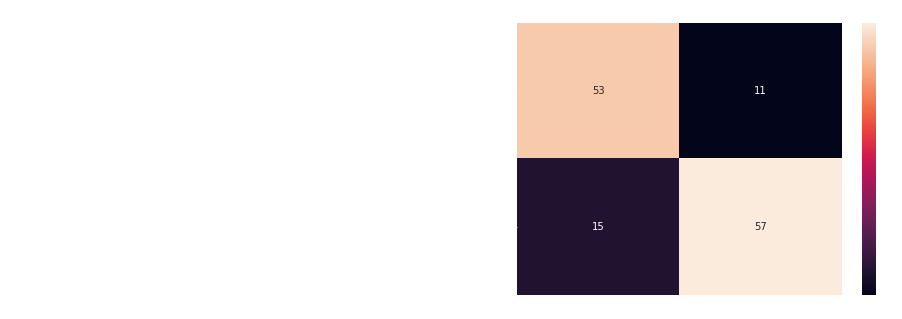

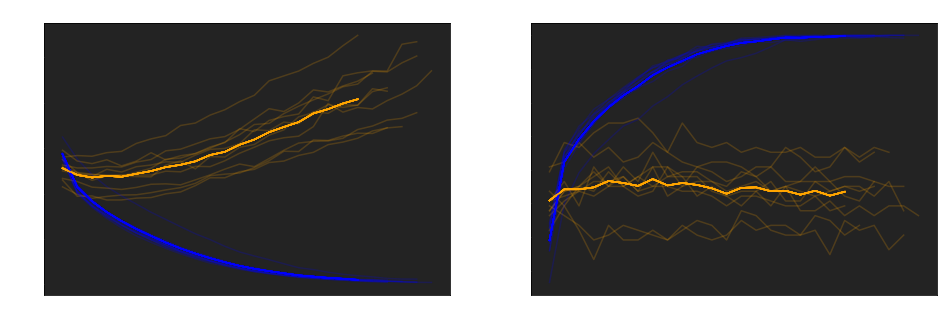

In [5]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('ANN - Predicted DDAs', loadNetworkHistories('ann', 'predictedDDAs-AdaptiveNDNs', 'concat'))

### CNN

In [ ]:
from utils.dataLoading import loadPredictedDDAs
from utils.training import trainCNN

for NDNs in ['10', '20', '50', '100', 'Adaptive']:
    print(f'\n{NDNs} NDNs')
    X_pos, X_neg = loadPredictedDDAs(NDNs)
    
    trainCNN(X_pos, X_neg, f'predictedDDAs-{NDNs}NDNs', numSamples=688)

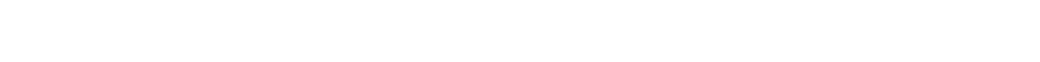

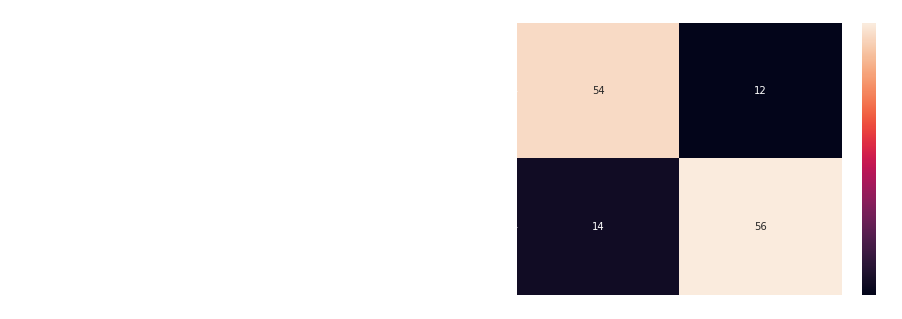

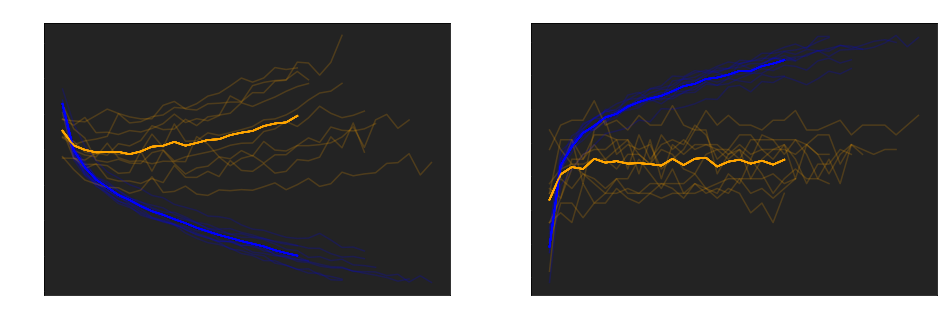

In [6]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('CNN - Predicted DDAs', loadNetworkHistories('cnn', 'predictedDDAs-AdaptiveNDNs', 'concat'))

### Analyze Results

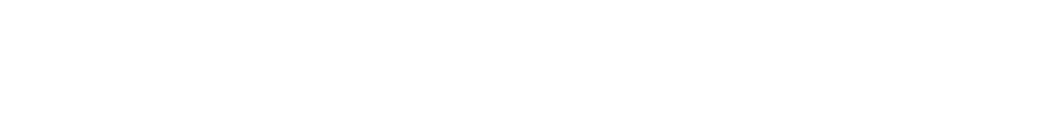

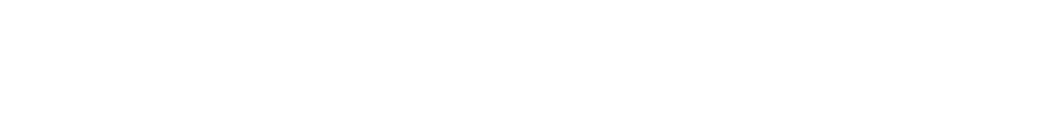

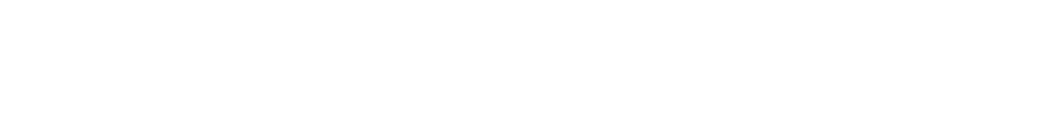

In [25]:
import matplotlib.pyplot as plt
from utils.plotting import getAvgClassifierAccuracy, getAvgMaxNetworkAccuracy, compareModels
from utils.modelHandling import loadNetworkHistories, loadClassifierHistories
import numpy as np

compareModels('LCF', 'NDNs', [10, 20, 50, 100, 'Adaptive'], 
             [getAvgClassifierAccuracy(loadClassifierHistories('lcf', f'predictedDDAs-{NDNs}NDNs')) for NDNs in [10, 20, 50, 100, 'Adaptive']]
             + [getAvgClassifierAccuracy(loadClassifierHistories('lcf', f'predictedDDAs'))])

compareModels('ANN', 'NDNs', [10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('ann', f'predictedDDAs-{NDNs}NDNs')) for NDNs in [10, 20, 50, 100, 'Adaptive']]
             + [getAvgMaxNetworkAccuracy(loadNetworkHistories('ann', f'predictedDDAs'))])

compareModels('CNN', 'NDNs', [10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('cnn', f'predictedDDAs-{NDNs}NDNs')) for NDNs in [10, 20, 50, 100, 'Adaptive']]
             + [getAvgMaxNetworkAccuracy(loadNetworkHistories('cnn', f'predictedDDAs'))])

## Test 3 - Retrospective Analysis

Question: Is the prediction of the type of an unclassified DDA possible with a high degree of accuracy? <br>
Approach: Retrospective analysis.

Compile Retrospective Analysis Dataset

In [1]:
from utils.dataCompilation import compileRetrospectiveAnalysisDataset

compileRetrospectiveAnalysisDataset(ndnNums=[20])

20 NDNs
	test
		168 marker
		195 therapeutic
	train
		1161 marker
		2182 therapeutic


### LCF

In [4]:
from utils.dataLoading import loadRetrospectiveAnalysisData
from utils.training import trainLCF

for NDNs in [5, 10, 20, 50, 100, 'Adaptive']:
    print(f'{NDNs} NDNs')
    X_pos_train, X_neg_train, X_pos_test, X_neg_test = loadRetrospectiveAnalysisData(NDNs)
    
    trainLCF(X_pos_train, X_neg_train, f'retrospectiveAnalysis-{NDNs}NDNs', X_pos_test=X_pos_test, X_neg_test=X_neg_test)

5 NDNs
Training classifier 1 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6585365853658537
Training classifier 2 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6707317073170732
Training classifier 3 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6341463414634146
Training classifier 4 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6707317073170732
Training classifier 5 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6341463414634146
Training classifier 6 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6463414634146342
Training classifier 7 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6585365853658537
Training classifier 8 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6585365853658537
Training classifier 9 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6463414634146342
Training classifier 10 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6463414634146342
10 NDNs
Training classifier 1 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6704545454545454
Training classifier 2 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6590909090909091
Training classifier 3 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6647727272727273
Training classifier 4 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6590909090909091
Training classifier 5 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6477272727272727
Training classifier 6 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6534090909090909
Training classifier 7 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6590909090909091
Training classifier 8 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6477272727272727
Training classifier 9 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6590909090909091
Training classifier 10 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6704545454545454
20 NDNs
Training classifier 1 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6994047619047619
Training classifier 2 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7083333333333334
Training classifier 3 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6904761904761905
Training classifier 4 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7113095238095238
Training classifier 5 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6934523809523809
Training classifier 6 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6964285714285714
Training classifier 7 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6845238095238095
Training classifier 8 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6904761904761905
Training classifier 9 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6815476190476191
Training classifier 10 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6815476190476191
50 NDNs
Training classifier 1 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7213930348258707
Training classifier 2 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7189054726368159
Training classifier 3 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7201492537313433
Training classifier 4 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7176616915422885
Training classifier 5 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7114427860696517
Training classifier 6 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7151741293532339
Training classifier 7 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7201492537313433
Training classifier 8 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7164179104477612
Training classifier 9 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7064676616915423
Training classifier 10 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7151741293532339
100 NDNs
Training classifier 1 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6981627296587927
Training classifier 2 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7020997375328084
Training classifier 3 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7073490813648294
Training classifier 4 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7073490813648294
Training classifier 5 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7099737532808399
Training classifier 6 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6955380577427821
Training classifier 7 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7086614173228346
Training classifier 8 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7073490813648294
Training classifier 9 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6876640419947506
Training classifier 10 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6981627296587927
Adaptive NDNs
Training classifier 1 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6768558951965066
Training classifier 2 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6506550218340611
Training classifier 3 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6528384279475983
Training classifier 4 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6746724890829694
Training classifier 5 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6724890829694323
Training classifier 6 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6593886462882096
Training classifier 7 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6724890829694323
Training classifier 8 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6615720524017468
Training classifier 9 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6681222707423581
Training classifier 10 / 10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6790393013100436


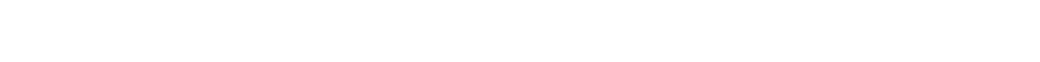

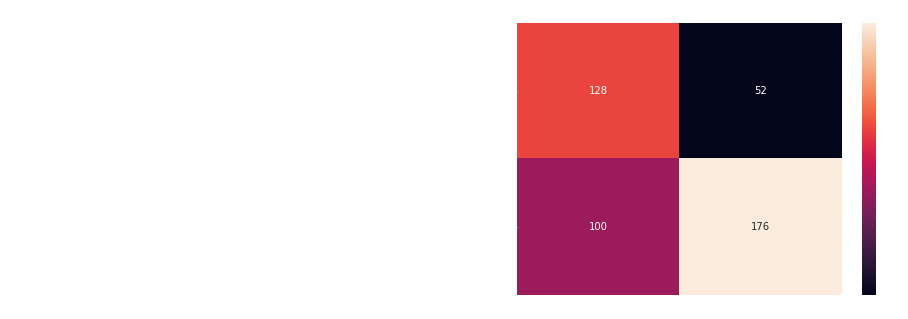

In [5]:
from utils.plotting import analyzeClassifier
from utils.modelHandling import loadClassifierHistories

analyzeClassifier('LCF - Predicted DDAs', loadClassifierHistories('lcf', 'retrospectiveAnalysis-AdaptiveNDNs'))

### ANN

In [6]:
from utils.dataLoading import loadRetrospectiveAnalysisData
from utils.training import trainANN

for NDNs in [5, 10, 20, 50, 100, 'Adaptive']:
    print(f'{NDNs} NDNs')
    X_pos_train, X_neg_train, X_pos_test, X_neg_test = loadRetrospectiveAnalysisData(NDNs)
    
    trainANN(X_pos_train, X_neg_train, f'retrospectiveAnalysis-{NDNs}NDNs', X_pos_test=X_pos_test, X_neg_test=X_neg_test)

5 NDNs
Training model 1 / 10
Train on 776 samples, validate on 82 samples
Epoch 1/1000
776/776 [==============================] - 1s 951us/step - loss: 0.6559 - acc: 0.6134 - val_loss: 0.6314 - val_acc: 0.7073

Epoch 00001: val_acc improved from -inf to 0.70732, saving model to models/ann_retrospectiveAnalysis-5NDNs_concat_0_0.h5
Epoch 2/1000
776/776 [==============================] - 0s 261us/step - loss: 0.5577 - acc: 0.7680 - val_loss: 0.5999 - val_acc: 0.7439

Epoch 00002: val_acc improved from 0.70732 to 0.74390, saving model to models/ann_retrospectiveAnalysis-5NDNs_concat_0_0.h5
Epoch 3/1000
776/776 [==============================] - 0s 247us/step - loss: 0.4852 - acc: 0.7964 - val_loss: 0.5877 - val_acc: 0.7073

Epoch 00003: val_acc did not improve from 0.74390
Epoch 4/1000
776/776 [==============================] - 0s 247us/step - loss: 0.4260 - acc: 0.8183 - val_loss: 0.5680 - val_acc: 0.7439

Epoch 00004: val_acc did not improve from 0.74390
Epoch 5/1000
776/776 [===========


Epoch 00011: val_acc did not improve from 0.81707
Epoch 12/1000
776/776 [==============================] - 0s 282us/step - loss: 0.0705 - acc: 0.9820 - val_loss: 0.8244 - val_acc: 0.7805

Epoch 00012: val_acc did not improve from 0.81707
Epoch 13/1000
776/776 [==============================] - 0s 268us/step - loss: 0.0598 - acc: 0.9871 - val_loss: 0.8145 - val_acc: 0.7805

Epoch 00013: val_acc did not improve from 0.81707
Epoch 14/1000
776/776 [==============================] - 0s 247us/step - loss: 0.0498 - acc: 0.9910 - val_loss: 0.7756 - val_acc: 0.8049

Epoch 00014: val_acc did not improve from 0.81707
Epoch 15/1000
776/776 [==============================] - 0s 242us/step - loss: 0.0454 - acc: 0.9923 - val_loss: 0.8710 - val_acc: 0.7805

Epoch 00015: val_acc did not improve from 0.81707
Epoch 16/1000
776/776 [==============================] - 0s 247us/step - loss: 0.0420 - acc: 0.9936 - val_loss: 0.9102 - val_acc: 0.8049

Epoch 00016: val_acc did not improve from 0.81707
Epoch 17/

776/776 [==============================] - 0s 265us/step - loss: 0.3021 - acc: 0.8879 - val_loss: 0.5794 - val_acc: 0.7927

Epoch 00003: val_acc improved from 0.71951 to 0.79268, saving model to models/ann_retrospectiveAnalysis-5NDNs_concat_0_3.h5
Epoch 4/1000
776/776 [==============================] - 0s 262us/step - loss: 0.2480 - acc: 0.9149 - val_loss: 0.6674 - val_acc: 0.7439

Epoch 00004: val_acc did not improve from 0.79268
Epoch 5/1000
776/776 [==============================] - 0s 263us/step - loss: 0.2116 - acc: 0.9265 - val_loss: 0.6747 - val_acc: 0.7683

Epoch 00005: val_acc did not improve from 0.79268
Epoch 6/1000
776/776 [==============================] - 0s 265us/step - loss: 0.1758 - acc: 0.9433 - val_loss: 0.6741 - val_acc: 0.7927

Epoch 00006: val_acc did not improve from 0.79268
Epoch 7/1000
776/776 [==============================] - 0s 268us/step - loss: 0.1494 - acc: 0.9510 - val_loss: 0.7331 - val_acc: 0.7439

Epoch 00007: val_acc did not improve from 0.79268
Epoc

Train on 776 samples, validate on 82 samples
Epoch 1/1000
776/776 [==============================] - 1s 1ms/step - loss: 0.5781 - acc: 0.6985 - val_loss: 0.5966 - val_acc: 0.7073

Epoch 00001: val_acc improved from -inf to 0.70732, saving model to models/ann_retrospectiveAnalysis-5NDNs_concat_0_6.h5
Epoch 2/1000
776/776 [==============================] - 0s 282us/step - loss: 0.3974 - acc: 0.8286 - val_loss: 0.6217 - val_acc: 0.7439

Epoch 00002: val_acc improved from 0.70732 to 0.74390, saving model to models/ann_retrospectiveAnalysis-5NDNs_concat_0_6.h5
Epoch 3/1000
776/776 [==============================] - 0s 280us/step - loss: 0.3247 - acc: 0.8634 - val_loss: 0.5831 - val_acc: 0.7561

Epoch 00003: val_acc improved from 0.74390 to 0.75610, saving model to models/ann_retrospectiveAnalysis-5NDNs_concat_0_6.h5
Epoch 4/1000
776/776 [==============================] - 0s 281us/step - loss: 0.2720 - acc: 0.8956 - val_loss: 0.5686 - val_acc: 0.7317

Epoch 00004: val_acc did not improve fro


Epoch 00018: val_acc did not improve from 0.78049
Epoch 19/1000
776/776 [==============================] - 0s 286us/step - loss: 0.0355 - acc: 0.9948 - val_loss: 1.0897 - val_acc: 0.7439

Epoch 00019: val_acc did not improve from 0.78049
Epoch 20/1000
776/776 [==============================] - 0s 276us/step - loss: 0.0339 - acc: 0.9948 - val_loss: 1.0734 - val_acc: 0.7561

Epoch 00020: val_acc did not improve from 0.78049
Epoch 21/1000
776/776 [==============================] - 0s 283us/step - loss: 0.0289 - acc: 0.9936 - val_loss: 1.1345 - val_acc: 0.7195

Epoch 00021: val_acc did not improve from 0.78049
Epoch 22/1000
776/776 [==============================] - 0s 281us/step - loss: 0.0253 - acc: 0.9974 - val_loss: 1.1602 - val_acc: 0.7439

Epoch 00022: val_acc did not improve from 0.78049
Epoch 23/1000
776/776 [==============================] - 0s 285us/step - loss: 0.0237 - acc: 0.9936 - val_loss: 1.1949 - val_acc: 0.7439

Epoch 00023: val_acc did not improve from 0.78049
Epoch 24/


Epoch 00009: val_acc did not improve from 0.80488
Epoch 10/1000
776/776 [==============================] - 0s 293us/step - loss: 0.1003 - acc: 0.9704 - val_loss: 0.8342 - val_acc: 0.7805

Epoch 00010: val_acc did not improve from 0.80488
Epoch 11/1000
776/776 [==============================] - 0s 290us/step - loss: 0.0837 - acc: 0.9832 - val_loss: 0.8525 - val_acc: 0.7683

Epoch 00011: val_acc did not improve from 0.80488
Epoch 12/1000
776/776 [==============================] - 0s 294us/step - loss: 0.0754 - acc: 0.9768 - val_loss: 0.8901 - val_acc: 0.7683

Epoch 00012: val_acc did not improve from 0.80488
Epoch 13/1000
776/776 [==============================] - 0s 290us/step - loss: 0.0648 - acc: 0.9884 - val_loss: 1.0022 - val_acc: 0.7683

Epoch 00013: val_acc did not improve from 0.80488
Epoch 14/1000
776/776 [==============================] - 0s 291us/step - loss: 0.0575 - acc: 0.9871 - val_loss: 1.0187 - val_acc: 0.7561

Epoch 00014: val_acc did not improve from 0.80488
Epoch 15/

1374/1374 [==============================] - 0s 315us/step - loss: 0.0327 - acc: 0.9920 - val_loss: 1.1291 - val_acc: 0.7102

Epoch 00026: val_acc did not improve from 0.71591
Epoch 27/1000
1374/1374 [==============================] - 0s 306us/step - loss: 0.0259 - acc: 0.9985 - val_loss: 1.1719 - val_acc: 0.6989

Epoch 00027: val_acc did not improve from 0.71591
Epoch 28/1000
1374/1374 [==============================] - 0s 307us/step - loss: 0.0243 - acc: 0.9956 - val_loss: 1.1878 - val_acc: 0.7045

Epoch 00028: val_acc did not improve from 0.71591
Epoch 00028: early stopping
Training model 2 / 10
Train on 1374 samples, validate on 176 samples
Epoch 1/1000
1374/1374 [==============================] - 2s 1ms/step - loss: 0.5559 - acc: 0.7132 - val_loss: 0.6253 - val_acc: 0.6989

Epoch 00001: val_acc improved from -inf to 0.69886, saving model to models/ann_retrospectiveAnalysis-10NDNs_concat_0_1.h5
Epoch 2/1000
1374/1374 [==============================] - 0s 307us/step - loss: 0.4130 -


Epoch 00014: val_acc did not improve from 0.75000
Epoch 15/1000
1374/1374 [==============================] - 0s 312us/step - loss: 0.0587 - acc: 0.9876 - val_loss: 0.8803 - val_acc: 0.7386

Epoch 00015: val_acc did not improve from 0.75000
Epoch 16/1000
1374/1374 [==============================] - 0s 311us/step - loss: 0.0495 - acc: 0.9905 - val_loss: 0.9380 - val_acc: 0.7330

Epoch 00016: val_acc did not improve from 0.75000
Epoch 17/1000
1374/1374 [==============================] - 0s 307us/step - loss: 0.0458 - acc: 0.9884 - val_loss: 0.9685 - val_acc: 0.7273

Epoch 00017: val_acc did not improve from 0.75000
Epoch 18/1000
1374/1374 [==============================] - 0s 308us/step - loss: 0.0383 - acc: 0.9934 - val_loss: 0.9950 - val_acc: 0.7273

Epoch 00018: val_acc did not improve from 0.75000
Epoch 19/1000
1374/1374 [==============================] - 0s 312us/step - loss: 0.0325 - acc: 0.9964 - val_loss: 1.0492 - val_acc: 0.7216

Epoch 00019: val_acc did not improve from 0.75000

1374/1374 [==============================] - 0s 322us/step - loss: 0.0151 - acc: 0.9993 - val_loss: 1.0122 - val_acc: 0.7500

Epoch 00025: val_acc did not improve from 0.75568
Epoch 26/1000
1374/1374 [==============================] - 0s 339us/step - loss: 0.0133 - acc: 1.0000 - val_loss: 1.0688 - val_acc: 0.7557

Epoch 00026: val_acc did not improve from 0.75568
Epoch 27/1000
1374/1374 [==============================] - 0s 361us/step - loss: 0.0118 - acc: 0.9993 - val_loss: 1.1204 - val_acc: 0.7443

Epoch 00027: val_acc did not improve from 0.75568
Epoch 28/1000
1374/1374 [==============================] - 0s 341us/step - loss: 0.0122 - acc: 0.9978 - val_loss: 1.0571 - val_acc: 0.7670

Epoch 00028: val_acc improved from 0.75568 to 0.76705, saving model to models/ann_retrospectiveAnalysis-10NDNs_concat_0_3.h5
Epoch 29/1000
1374/1374 [==============================] - 0s 344us/step - loss: 0.0136 - acc: 0.9985 - val_loss: 1.1529 - val_acc: 0.7670

Epoch 00029: val_acc did not improve fr

1374/1374 [==============================] - 0s 317us/step - loss: 0.0468 - acc: 0.9898 - val_loss: 0.9048 - val_acc: 0.6875

Epoch 00018: val_acc did not improve from 0.73864
Epoch 19/1000
1374/1374 [==============================] - 0s 315us/step - loss: 0.0395 - acc: 0.9934 - val_loss: 0.9390 - val_acc: 0.7159

Epoch 00019: val_acc did not improve from 0.73864
Epoch 20/1000
1374/1374 [==============================] - 0s 316us/step - loss: 0.0351 - acc: 0.9927 - val_loss: 0.9914 - val_acc: 0.6989

Epoch 00020: val_acc did not improve from 0.73864
Epoch 21/1000
1374/1374 [==============================] - 0s 326us/step - loss: 0.0323 - acc: 0.9934 - val_loss: 1.0091 - val_acc: 0.7102

Epoch 00021: val_acc did not improve from 0.73864
Epoch 22/1000
1374/1374 [==============================] - 0s 336us/step - loss: 0.0408 - acc: 0.9847 - val_loss: 0.9872 - val_acc: 0.7159

Epoch 00022: val_acc did not improve from 0.73864
Epoch 23/1000
1374/1374 [==============================] - 0s 34


Epoch 00003: val_acc improved from 0.71023 to 0.71591, saving model to models/ann_retrospectiveAnalysis-10NDNs_concat_0_6.h5
Epoch 4/1000
1374/1374 [==============================] - 0s 352us/step - loss: 0.3129 - acc: 0.8697 - val_loss: 0.5888 - val_acc: 0.7159

Epoch 00004: val_acc did not improve from 0.71591
Epoch 5/1000
1374/1374 [==============================] - 0s 354us/step - loss: 0.2749 - acc: 0.9010 - val_loss: 0.6156 - val_acc: 0.7330

Epoch 00005: val_acc improved from 0.71591 to 0.73295, saving model to models/ann_retrospectiveAnalysis-10NDNs_concat_0_6.h5
Epoch 6/1000
1374/1374 [==============================] - 0s 358us/step - loss: 0.2389 - acc: 0.9141 - val_loss: 0.6944 - val_acc: 0.7045

Epoch 00006: val_acc did not improve from 0.73295
Epoch 7/1000
1374/1374 [==============================] - 1s 368us/step - loss: 0.2163 - acc: 0.9258 - val_loss: 0.6945 - val_acc: 0.7273

Epoch 00007: val_acc did not improve from 0.73295
Epoch 8/1000
1374/1374 [===================


Epoch 00026: val_acc did not improve from 0.75000
Epoch 27/1000
1374/1374 [==============================] - 0s 336us/step - loss: 0.0163 - acc: 0.9971 - val_loss: 1.0887 - val_acc: 0.7216

Epoch 00027: val_acc did not improve from 0.75000
Epoch 28/1000
1374/1374 [==============================] - 0s 337us/step - loss: 0.0164 - acc: 0.9971 - val_loss: 1.2082 - val_acc: 0.7216

Epoch 00028: val_acc did not improve from 0.75000
Epoch 29/1000
1374/1374 [==============================] - 0s 334us/step - loss: 0.0129 - acc: 0.9993 - val_loss: 1.2094 - val_acc: 0.7273

Epoch 00029: val_acc did not improve from 0.75000
Epoch 30/1000
1374/1374 [==============================] - 0s 335us/step - loss: 0.0134 - acc: 0.9971 - val_loss: 1.1798 - val_acc: 0.7386

Epoch 00030: val_acc did not improve from 0.75000
Epoch 31/1000
1374/1374 [==============================] - 0s 334us/step - loss: 0.0122 - acc: 0.9971 - val_loss: 1.2815 - val_acc: 0.7216

Epoch 00031: val_acc did not improve from 0.75000

2322/2322 [==============================] - 1s 343us/step - loss: 0.4514 - acc: 0.7946 - val_loss: 0.5364 - val_acc: 0.7173

Epoch 00003: val_acc improved from 0.71131 to 0.71726, saving model to models/ann_retrospectiveAnalysis-20NDNs_concat_0_0.h5
Epoch 4/1000
2322/2322 [==============================] - 1s 347us/step - loss: 0.4054 - acc: 0.8183 - val_loss: 0.5531 - val_acc: 0.7054

Epoch 00004: val_acc did not improve from 0.71726
Epoch 5/1000
2322/2322 [==============================] - 1s 348us/step - loss: 0.3693 - acc: 0.8394 - val_loss: 0.5301 - val_acc: 0.7202

Epoch 00005: val_acc improved from 0.71726 to 0.72024, saving model to models/ann_retrospectiveAnalysis-20NDNs_concat_0_0.h5
Epoch 6/1000
2322/2322 [==============================] - 1s 348us/step - loss: 0.3316 - acc: 0.8613 - val_loss: 0.5175 - val_acc: 0.7381

Epoch 00006: val_acc improved from 0.72024 to 0.73810, saving model to models/ann_retrospectiveAnalysis-20NDNs_concat_0_0.h5
Epoch 7/1000
2322/2322 [========


Epoch 00013: val_acc did not improve from 0.76488
Epoch 14/1000
2322/2322 [==============================] - 1s 360us/step - loss: 0.0853 - acc: 0.9742 - val_loss: 0.7500 - val_acc: 0.7470

Epoch 00014: val_acc did not improve from 0.76488
Epoch 15/1000
2322/2322 [==============================] - 1s 360us/step - loss: 0.0766 - acc: 0.9798 - val_loss: 0.7663 - val_acc: 0.7351

Epoch 00015: val_acc did not improve from 0.76488
Epoch 16/1000
2322/2322 [==============================] - 1s 359us/step - loss: 0.0680 - acc: 0.9811 - val_loss: 0.7977 - val_acc: 0.7500

Epoch 00016: val_acc did not improve from 0.76488
Epoch 17/1000
2322/2322 [==============================] - 1s 360us/step - loss: 0.0582 - acc: 0.9862 - val_loss: 0.8140 - val_acc: 0.7589

Epoch 00017: val_acc did not improve from 0.76488
Epoch 18/1000
2322/2322 [==============================] - 1s 364us/step - loss: 0.0505 - acc: 0.9866 - val_loss: 0.8420 - val_acc: 0.7589

Epoch 00018: val_acc did not improve from 0.76488

2322/2322 [==============================] - 1s 357us/step - loss: 0.2700 - acc: 0.8915 - val_loss: 0.5231 - val_acc: 0.7619

Epoch 00006: val_acc did not improve from 0.77083
Epoch 7/1000
2322/2322 [==============================] - 1s 359us/step - loss: 0.2419 - acc: 0.9065 - val_loss: 0.5191 - val_acc: 0.7589

Epoch 00007: val_acc did not improve from 0.77083
Epoch 8/1000
2322/2322 [==============================] - 1s 392us/step - loss: 0.2156 - acc: 0.9160 - val_loss: 0.5368 - val_acc: 0.7649

Epoch 00008: val_acc did not improve from 0.77083
Epoch 9/1000
2322/2322 [==============================] - 1s 388us/step - loss: 0.1913 - acc: 0.9328 - val_loss: 0.5681 - val_acc: 0.7560

Epoch 00009: val_acc did not improve from 0.77083
Epoch 10/1000
2322/2322 [==============================] - 1s 390us/step - loss: 0.1696 - acc: 0.9371 - val_loss: 0.5472 - val_acc: 0.7798

Epoch 00010: val_acc improved from 0.77083 to 0.77976, saving model to models/ann_retrospectiveAnalysis-20NDNs_concat

2322/2322 [==============================] - 1s 367us/step - loss: 0.2337 - acc: 0.9165 - val_loss: 0.5709 - val_acc: 0.7440

Epoch 00007: val_acc did not improve from 0.74405
Epoch 8/1000
2322/2322 [==============================] - 1s 366us/step - loss: 0.2070 - acc: 0.9203 - val_loss: 0.5951 - val_acc: 0.7470

Epoch 00008: val_acc improved from 0.74405 to 0.74702, saving model to models/ann_retrospectiveAnalysis-20NDNs_concat_0_4.h5
Epoch 9/1000
2322/2322 [==============================] - 1s 368us/step - loss: 0.1798 - acc: 0.9320 - val_loss: 0.6154 - val_acc: 0.7500

Epoch 00009: val_acc improved from 0.74702 to 0.75000, saving model to models/ann_retrospectiveAnalysis-20NDNs_concat_0_4.h5
Epoch 10/1000
2322/2322 [==============================] - 1s 369us/step - loss: 0.1569 - acc: 0.9414 - val_loss: 0.6379 - val_acc: 0.7530

Epoch 00010: val_acc improved from 0.75000 to 0.75298, saving model to models/ann_retrospectiveAnalysis-20NDNs_concat_0_4.h5
Epoch 11/1000
2322/2322 [======


Epoch 00016: val_acc did not improve from 0.76190
Epoch 17/1000
2322/2322 [==============================] - 1s 402us/step - loss: 0.0555 - acc: 0.9875 - val_loss: 0.9264 - val_acc: 0.7470

Epoch 00017: val_acc did not improve from 0.76190
Epoch 18/1000
2322/2322 [==============================] - 1s 413us/step - loss: 0.0492 - acc: 0.9897 - val_loss: 1.0306 - val_acc: 0.7351

Epoch 00018: val_acc did not improve from 0.76190
Epoch 19/1000
2322/2322 [==============================] - 1s 395us/step - loss: 0.0448 - acc: 0.9914 - val_loss: 1.0241 - val_acc: 0.7440

Epoch 00019: val_acc did not improve from 0.76190
Epoch 20/1000
2322/2322 [==============================] - 1s 392us/step - loss: 0.0392 - acc: 0.9922 - val_loss: 0.9896 - val_acc: 0.7470

Epoch 00020: val_acc did not improve from 0.76190
Epoch 21/1000
2322/2322 [==============================] - 1s 390us/step - loss: 0.0314 - acc: 0.9940 - val_loss: 1.0695 - val_acc: 0.7381

Epoch 00021: val_acc did not improve from 0.76190


Epoch 00031: val_acc did not improve from 0.77381
Epoch 32/1000
2322/2322 [==============================] - 1s 421us/step - loss: 0.0202 - acc: 0.9940 - val_loss: 1.2712 - val_acc: 0.7679

Epoch 00032: val_acc did not improve from 0.77381
Epoch 00032: early stopping
Training model 8 / 10
Train on 2322 samples, validate on 336 samples
Epoch 1/1000
2322/2322 [==============================] - 4s 2ms/step - loss: 0.5566 - acc: 0.7080 - val_loss: 0.5657 - val_acc: 0.7054

Epoch 00001: val_acc improved from -inf to 0.70536, saving model to models/ann_retrospectiveAnalysis-20NDNs_concat_0_7.h5
Epoch 2/1000
2322/2322 [==============================] - 1s 400us/step - loss: 0.4299 - acc: 0.8049 - val_loss: 0.5527 - val_acc: 0.7351

Epoch 00002: val_acc improved from 0.70536 to 0.73512, saving model to models/ann_retrospectiveAnalysis-20NDNs_concat_0_7.h5
Epoch 3/1000
2322/2322 [==============================] - 1s 409us/step - loss: 0.3747 - acc: 0.8303 - val_loss: 0.5515 - val_acc: 0.7321



Epoch 6/1000
2322/2322 [==============================] - 1s 406us/step - loss: 0.2613 - acc: 0.8945 - val_loss: 0.5180 - val_acc: 0.7589

Epoch 00006: val_acc did not improve from 0.75893
Epoch 7/1000
2322/2322 [==============================] - 1s 400us/step - loss: 0.2321 - acc: 0.9087 - val_loss: 0.5243 - val_acc: 0.7738

Epoch 00007: val_acc improved from 0.75893 to 0.77381, saving model to models/ann_retrospectiveAnalysis-20NDNs_concat_0_9.h5
Epoch 8/1000
2322/2322 [==============================] - 1s 393us/step - loss: 0.2061 - acc: 0.9208 - val_loss: 0.5424 - val_acc: 0.7619

Epoch 00008: val_acc did not improve from 0.77381
Epoch 9/1000
2322/2322 [==============================] - 1s 393us/step - loss: 0.1793 - acc: 0.9414 - val_loss: 0.5551 - val_acc: 0.7708

Epoch 00009: val_acc did not improve from 0.77381
Epoch 10/1000
2322/2322 [==============================] - 1s 390us/step - loss: 0.1623 - acc: 0.9406 - val_loss: 0.5794 - val_acc: 0.7708

Epoch 00010: val_acc did not 

4622/4622 [==============================] - 2s 456us/step - loss: 0.0322 - acc: 0.9920 - val_loss: 1.1223 - val_acc: 0.7525

Epoch 00023: val_acc did not improve from 0.75249
Epoch 24/1000
4622/4622 [==============================] - 2s 477us/step - loss: 0.0288 - acc: 0.9924 - val_loss: 1.1855 - val_acc: 0.7425

Epoch 00024: val_acc did not improve from 0.75249
Epoch 25/1000
4622/4622 [==============================] - 2s 455us/step - loss: 0.0280 - acc: 0.9922 - val_loss: 1.2019 - val_acc: 0.7413

Epoch 00025: val_acc did not improve from 0.75249
Epoch 26/1000
4622/4622 [==============================] - 2s 407us/step - loss: 0.0224 - acc: 0.9948 - val_loss: 1.2753 - val_acc: 0.7450

Epoch 00026: val_acc did not improve from 0.75249
Epoch 27/1000
4622/4622 [==============================] - 2s 406us/step - loss: 0.0200 - acc: 0.9959 - val_loss: 1.3225 - val_acc: 0.7376

Epoch 00027: val_acc did not improve from 0.75249
Epoch 28/1000
4622/4622 [==============================] - 2s 45


Epoch 00032: val_acc did not improve from 0.77985
Epoch 33/1000
4622/4622 [==============================] - 2s 450us/step - loss: 0.0249 - acc: 0.9926 - val_loss: 1.3792 - val_acc: 0.7537

Epoch 00033: val_acc did not improve from 0.77985
Epoch 34/1000
4622/4622 [==============================] - 2s 447us/step - loss: 0.0106 - acc: 0.9987 - val_loss: 1.3679 - val_acc: 0.7662

Epoch 00034: val_acc did not improve from 0.77985
Epoch 00034: early stopping
Training model 4 / 10
Train on 4622 samples, validate on 804 samples
Epoch 1/1000
4622/4622 [==============================] - 5s 1ms/step - loss: 0.5350 - acc: 0.7203 - val_loss: 0.5446 - val_acc: 0.7114

Epoch 00001: val_acc improved from -inf to 0.71144, saving model to models/ann_retrospectiveAnalysis-50NDNs_concat_0_3.h5
Epoch 2/1000
4622/4622 [==============================] - 2s 476us/step - loss: 0.4293 - acc: 0.7990 - val_loss: 0.5224 - val_acc: 0.7239

Epoch 00002: val_acc improved from 0.71144 to 0.72388, saving model to mod

4622/4622 [==============================] - 2s 436us/step - loss: 0.0122 - acc: 0.9970 - val_loss: 1.3918 - val_acc: 0.7525

Epoch 00032: val_acc did not improve from 0.76741
Epoch 33/1000
4622/4622 [==============================] - 2s 452us/step - loss: 0.0081 - acc: 0.9991 - val_loss: 1.5058 - val_acc: 0.7612

Epoch 00033: val_acc did not improve from 0.76741
Epoch 34/1000
4622/4622 [==============================] - 2s 438us/step - loss: 0.0213 - acc: 0.9933 - val_loss: 1.4337 - val_acc: 0.7525

Epoch 00034: val_acc did not improve from 0.76741
Epoch 35/1000
4622/4622 [==============================] - 2s 453us/step - loss: 0.0239 - acc: 0.9935 - val_loss: 1.4614 - val_acc: 0.7512

Epoch 00035: val_acc did not improve from 0.76741
Epoch 00035: early stopping
Training model 6 / 10
Train on 4622 samples, validate on 804 samples
Epoch 1/1000
4622/4622 [==============================] - 5s 1ms/step - loss: 0.5381 - acc: 0.7131 - val_loss: 0.5483 - val_acc: 0.7251

Epoch 00001: val_acc


Epoch 00036: val_acc did not improve from 0.77736
Epoch 37/1000
4622/4622 [==============================] - 2s 439us/step - loss: 0.0168 - acc: 0.9955 - val_loss: 1.4720 - val_acc: 0.7624

Epoch 00037: val_acc did not improve from 0.77736
Epoch 38/1000
4622/4622 [==============================] - 2s 450us/step - loss: 0.0141 - acc: 0.9959 - val_loss: 1.5458 - val_acc: 0.7525

Epoch 00038: val_acc did not improve from 0.77736
Epoch 39/1000
4622/4622 [==============================] - 3s 554us/step - loss: 0.0122 - acc: 0.9963 - val_loss: 1.4882 - val_acc: 0.7637

Epoch 00039: val_acc did not improve from 0.77736
Epoch 40/1000
4622/4622 [==============================] - 2s 440us/step - loss: 0.0041 - acc: 0.9996 - val_loss: 1.5506 - val_acc: 0.7587

Epoch 00040: val_acc did not improve from 0.77736
Epoch 41/1000
4622/4622 [==============================] - 2s 451us/step - loss: 0.0031 - acc: 0.9998 - val_loss: 1.6025 - val_acc: 0.7600

Epoch 00041: val_acc did not improve from 0.77736

4622/4622 [==============================] - 2s 486us/step - loss: 0.2781 - acc: 0.8827 - val_loss: 0.5603 - val_acc: 0.7525

Epoch 00006: val_acc improved from 0.74751 to 0.75249, saving model to models/ann_retrospectiveAnalysis-50NDNs_concat_0_8.h5
Epoch 7/1000
4622/4622 [==============================] - 2s 484us/step - loss: 0.2494 - acc: 0.8996 - val_loss: 0.5729 - val_acc: 0.7450

Epoch 00007: val_acc did not improve from 0.75249
Epoch 8/1000
4622/4622 [==============================] - 2s 522us/step - loss: 0.2231 - acc: 0.9109 - val_loss: 0.5873 - val_acc: 0.7550

Epoch 00008: val_acc improved from 0.75249 to 0.75498, saving model to models/ann_retrospectiveAnalysis-50NDNs_concat_0_8.h5
Epoch 9/1000
4622/4622 [==============================] - 2s 530us/step - loss: 0.1995 - acc: 0.9193 - val_loss: 0.6030 - val_acc: 0.7600

Epoch 00009: val_acc improved from 0.75498 to 0.75995, saving model to models/ann_retrospectiveAnalysis-50NDNs_concat_0_8.h5
Epoch 10/1000
4622/4622 [=======


Epoch 00004: val_acc improved from 0.75000 to 0.76244, saving model to models/ann_retrospectiveAnalysis-50NDNs_concat_0_9.h5
Epoch 5/1000
4622/4622 [==============================] - 2s 504us/step - loss: 0.3122 - acc: 0.8669 - val_loss: 0.5040 - val_acc: 0.7687

Epoch 00005: val_acc improved from 0.76244 to 0.76866, saving model to models/ann_retrospectiveAnalysis-50NDNs_concat_0_9.h5
Epoch 6/1000
4622/4622 [==============================] - 2s 466us/step - loss: 0.2826 - acc: 0.8804 - val_loss: 0.5146 - val_acc: 0.7674

Epoch 00006: val_acc did not improve from 0.76866
Epoch 7/1000
4622/4622 [==============================] - 2s 516us/step - loss: 0.2528 - acc: 0.8949 - val_loss: 0.5237 - val_acc: 0.7687

Epoch 00007: val_acc did not improve from 0.76866
Epoch 8/1000
4622/4622 [==============================] - 2s 485us/step - loss: 0.2290 - acc: 0.9078 - val_loss: 0.5351 - val_acc: 0.7612

Epoch 00008: val_acc did not improve from 0.76866
Epoch 9/1000
4622/4622 [===================

7586/7586 [==============================] - 4s 577us/step - loss: 0.2076 - acc: 0.9196 - val_loss: 0.6408 - val_acc: 0.7638

Epoch 00010: val_acc did not improve from 0.77559
Epoch 11/1000
7586/7586 [==============================] - 5s 608us/step - loss: 0.1865 - acc: 0.9315 - val_loss: 0.6862 - val_acc: 0.7638

Epoch 00011: val_acc did not improve from 0.77559
Epoch 12/1000
7586/7586 [==============================] - 4s 560us/step - loss: 0.1635 - acc: 0.9382 - val_loss: 0.7329 - val_acc: 0.7533

Epoch 00012: val_acc did not improve from 0.77559
Epoch 13/1000
7586/7586 [==============================] - 4s 512us/step - loss: 0.1450 - acc: 0.9474 - val_loss: 0.7363 - val_acc: 0.7612

Epoch 00013: val_acc did not improve from 0.77559
Epoch 14/1000
7586/7586 [==============================] - 4s 477us/step - loss: 0.1271 - acc: 0.9543 - val_loss: 0.8138 - val_acc: 0.7520

Epoch 00014: val_acc did not improve from 0.77559
Epoch 15/1000
7586/7586 [==============================] - 4s 49

7586/7586 [==============================] - 4s 495us/step - loss: 0.0378 - acc: 0.9895 - val_loss: 1.3407 - val_acc: 0.7362

Epoch 00023: val_acc did not improve from 0.76772
Epoch 24/1000
7586/7586 [==============================] - 5s 596us/step - loss: 0.0303 - acc: 0.9931 - val_loss: 1.3136 - val_acc: 0.7362

Epoch 00024: val_acc did not improve from 0.76772
Epoch 25/1000
7586/7586 [==============================] - 5s 613us/step - loss: 0.0337 - acc: 0.9904 - val_loss: 1.3482 - val_acc: 0.7467

Epoch 00025: val_acc did not improve from 0.76772
Epoch 26/1000
7586/7586 [==============================] - 4s 493us/step - loss: 0.0297 - acc: 0.9918 - val_loss: 1.3785 - val_acc: 0.7507

Epoch 00026: val_acc did not improve from 0.76772
Epoch 00026: early stopping
Training model 3 / 10
Train on 7586 samples, validate on 762 samples
Epoch 1/1000
7586/7586 [==============================] - 9s 1ms/step - loss: 0.5270 - acc: 0.7265 - val_loss: 0.5234 - val_acc: 0.7323

Epoch 00001: val_acc

Epoch 2/1000
7586/7586 [==============================] - 4s 509us/step - loss: 0.4325 - acc: 0.7920 - val_loss: 0.5333 - val_acc: 0.7402

Epoch 00002: val_acc improved from 0.72310 to 0.74016, saving model to models/ann_retrospectiveAnalysis-100NDNs_concat_0_3.h5
Epoch 3/1000
7586/7586 [==============================] - 4s 510us/step - loss: 0.3864 - acc: 0.8212 - val_loss: 0.5305 - val_acc: 0.7533

Epoch 00003: val_acc improved from 0.74016 to 0.75328, saving model to models/ann_retrospectiveAnalysis-100NDNs_concat_0_3.h5
Epoch 4/1000
7586/7586 [==============================] - 5s 596us/step - loss: 0.3477 - acc: 0.8421 - val_loss: 0.5492 - val_acc: 0.7585

Epoch 00004: val_acc improved from 0.75328 to 0.75853, saving model to models/ann_retrospectiveAnalysis-100NDNs_concat_0_3.h5
Epoch 5/1000
7586/7586 [==============================] - 4s 581us/step - loss: 0.3158 - acc: 0.8633 - val_loss: 0.5788 - val_acc: 0.7520

Epoch 00005: val_acc did not improve from 0.75853
Epoch 6/1000
758


Epoch 00027: val_acc did not improve from 0.76115
Epoch 28/1000
7586/7586 [==============================] - 4s 494us/step - loss: 0.0244 - acc: 0.9930 - val_loss: 1.4291 - val_acc: 0.7441

Epoch 00028: val_acc did not improve from 0.76115
Epoch 29/1000
7586/7586 [==============================] - 4s 492us/step - loss: 0.0273 - acc: 0.9913 - val_loss: 1.3494 - val_acc: 0.7480

Epoch 00029: val_acc did not improve from 0.76115
Epoch 30/1000
7586/7586 [==============================] - 4s 493us/step - loss: 0.0238 - acc: 0.9925 - val_loss: 1.4122 - val_acc: 0.7520

Epoch 00030: val_acc did not improve from 0.76115
Epoch 31/1000
7586/7586 [==============================] - 4s 495us/step - loss: 0.0240 - acc: 0.9942 - val_loss: 1.4585 - val_acc: 0.7520

Epoch 00031: val_acc did not improve from 0.76115
Epoch 32/1000
7586/7586 [==============================] - 4s 497us/step - loss: 0.0231 - acc: 0.9930 - val_loss: 1.5991 - val_acc: 0.7375

Epoch 00032: val_acc did not improve from 0.76115

7586/7586 [==============================] - 4s 557us/step - loss: 0.0304 - acc: 0.9918 - val_loss: 1.2400 - val_acc: 0.7572

Epoch 00024: val_acc did not improve from 0.76640
Epoch 25/1000
7586/7586 [==============================] - 4s 506us/step - loss: 0.0328 - acc: 0.9910 - val_loss: 1.2519 - val_acc: 0.7598

Epoch 00025: val_acc did not improve from 0.76640
Epoch 26/1000
7586/7586 [==============================] - 4s 493us/step - loss: 0.0273 - acc: 0.9918 - val_loss: 1.2238 - val_acc: 0.7612

Epoch 00026: val_acc did not improve from 0.76640
Epoch 27/1000
7586/7586 [==============================] - 4s 484us/step - loss: 0.0232 - acc: 0.9935 - val_loss: 1.3001 - val_acc: 0.7703

Epoch 00027: val_acc improved from 0.76640 to 0.77034, saving model to models/ann_retrospectiveAnalysis-100NDNs_concat_0_6.h5
Epoch 28/1000
7586/7586 [==============================] - 4s 507us/step - loss: 0.0287 - acc: 0.9927 - val_loss: 1.3428 - val_acc: 0.7598

Epoch 00028: val_acc did not improve f


Epoch 00016: val_acc did not improve from 0.77297
Epoch 17/1000
7586/7586 [==============================] - 4s 482us/step - loss: 0.0796 - acc: 0.9727 - val_loss: 0.9244 - val_acc: 0.7533

Epoch 00017: val_acc did not improve from 0.77297
Epoch 18/1000
7586/7586 [==============================] - 4s 513us/step - loss: 0.0713 - acc: 0.9780 - val_loss: 0.9602 - val_acc: 0.7664

Epoch 00018: val_acc did not improve from 0.77297
Epoch 19/1000
7586/7586 [==============================] - 4s 499us/step - loss: 0.0630 - acc: 0.9802 - val_loss: 1.0347 - val_acc: 0.7559

Epoch 00019: val_acc did not improve from 0.77297
Epoch 20/1000
7586/7586 [==============================] - 4s 523us/step - loss: 0.0580 - acc: 0.9796 - val_loss: 1.1176 - val_acc: 0.7572

Epoch 00020: val_acc did not improve from 0.77297
Epoch 21/1000
7586/7586 [==============================] - 4s 480us/step - loss: 0.0503 - acc: 0.9850 - val_loss: 1.1134 - val_acc: 0.7717

Epoch 00021: val_acc did not improve from 0.77297

7586/7586 [==============================] - 4s 496us/step - loss: 0.2104 - acc: 0.9152 - val_loss: 0.6124 - val_acc: 0.7703

Epoch 00009: val_acc improved from 0.76772 to 0.77034, saving model to models/ann_retrospectiveAnalysis-100NDNs_concat_0_8.h5
Epoch 10/1000
7586/7586 [==============================] - 4s 498us/step - loss: 0.1881 - acc: 0.9268 - val_loss: 0.6118 - val_acc: 0.7677

Epoch 00010: val_acc did not improve from 0.77034
Epoch 11/1000
7586/7586 [==============================] - 4s 496us/step - loss: 0.1676 - acc: 0.9367 - val_loss: 0.6442 - val_acc: 0.7572

Epoch 00011: val_acc did not improve from 0.77034
Epoch 12/1000
7586/7586 [==============================] - 4s 497us/step - loss: 0.1445 - acc: 0.9460 - val_loss: 0.6989 - val_acc: 0.7612

Epoch 00012: val_acc did not improve from 0.77034
Epoch 13/1000
7586/7586 [==============================] - 4s 495us/step - loss: 0.1287 - acc: 0.9540 - val_loss: 0.7334 - val_acc: 0.7546

Epoch 00013: val_acc did not improve f

2108/2108 [==============================] - 1s 529us/step - loss: 0.2280 - acc: 0.9160 - val_loss: 0.5787 - val_acc: 0.7380

Epoch 00010: val_acc did not improve from 0.74236
Epoch 11/1000
2108/2108 [==============================] - 1s 543us/step - loss: 0.2067 - acc: 0.9241 - val_loss: 0.5756 - val_acc: 0.7358

Epoch 00011: val_acc did not improve from 0.74236
Epoch 12/1000
2108/2108 [==============================] - 1s 529us/step - loss: 0.1838 - acc: 0.9402 - val_loss: 0.6044 - val_acc: 0.7336

Epoch 00012: val_acc did not improve from 0.74236
Epoch 13/1000
2108/2108 [==============================] - 1s 537us/step - loss: 0.1629 - acc: 0.9516 - val_loss: 0.6330 - val_acc: 0.7314

Epoch 00013: val_acc did not improve from 0.74236
Epoch 14/1000
2108/2108 [==============================] - 1s 570us/step - loss: 0.1470 - acc: 0.9564 - val_loss: 0.6246 - val_acc: 0.7402

Epoch 00014: val_acc did not improve from 0.74236
Epoch 15/1000
2108/2108 [==============================] - 1s 53

2108/2108 [==============================] - 1s 586us/step - loss: 0.0815 - acc: 0.9815 - val_loss: 0.7975 - val_acc: 0.7314

Epoch 00015: val_acc did not improve from 0.74672
Epoch 16/1000
2108/2108 [==============================] - 1s 588us/step - loss: 0.0709 - acc: 0.9862 - val_loss: 0.8289 - val_acc: 0.7249

Epoch 00016: val_acc did not improve from 0.74672
Epoch 17/1000
2108/2108 [==============================] - 1s 589us/step - loss: 0.0603 - acc: 0.9886 - val_loss: 0.8804 - val_acc: 0.7162

Epoch 00017: val_acc did not improve from 0.74672
Epoch 18/1000
2108/2108 [==============================] - 1s 589us/step - loss: 0.0549 - acc: 0.9886 - val_loss: 0.9254 - val_acc: 0.7118

Epoch 00018: val_acc did not improve from 0.74672
Epoch 19/1000
2108/2108 [==============================] - 1s 589us/step - loss: 0.0462 - acc: 0.9905 - val_loss: 0.9226 - val_acc: 0.7293

Epoch 00019: val_acc did not improve from 0.74672
Epoch 20/1000
2108/2108 [==============================] - 1s 60

Epoch 2/1000
2108/2108 [==============================] - 1s 595us/step - loss: 0.4206 - acc: 0.8041 - val_loss: 0.5450 - val_acc: 0.7358

Epoch 00002: val_acc improved from 0.71834 to 0.73581, saving model to models/ann_retrospectiveAnalysis-AdaptiveNDNs_concat_0_3.h5
Epoch 3/1000
2108/2108 [==============================] - 1s 580us/step - loss: 0.3642 - acc: 0.8468 - val_loss: 0.5402 - val_acc: 0.7314

Epoch 00003: val_acc did not improve from 0.73581
Epoch 4/1000
2108/2108 [==============================] - 1s 593us/step - loss: 0.3211 - acc: 0.8676 - val_loss: 0.5477 - val_acc: 0.7227

Epoch 00004: val_acc did not improve from 0.73581
Epoch 5/1000
2108/2108 [==============================] - 1s 595us/step - loss: 0.2833 - acc: 0.8876 - val_loss: 0.5318 - val_acc: 0.7336

Epoch 00005: val_acc did not improve from 0.73581
Epoch 6/1000
2108/2108 [==============================] - 1s 575us/step - loss: 0.2504 - acc: 0.9018 - val_loss: 0.5478 - val_acc: 0.7467

Epoch 00006: val_acc imp

Epoch 8/1000
2108/2108 [==============================] - 1s 601us/step - loss: 0.1954 - acc: 0.9255 - val_loss: 0.5881 - val_acc: 0.7533

Epoch 00008: val_acc did not improve from 0.75328
Epoch 9/1000
2108/2108 [==============================] - 1s 602us/step - loss: 0.1711 - acc: 0.9454 - val_loss: 0.6010 - val_acc: 0.7686

Epoch 00009: val_acc improved from 0.75328 to 0.76856, saving model to models/ann_retrospectiveAnalysis-AdaptiveNDNs_concat_0_5.h5
Epoch 10/1000
2108/2108 [==============================] - 1s 622us/step - loss: 0.1523 - acc: 0.9492 - val_loss: 0.6410 - val_acc: 0.7533

Epoch 00010: val_acc did not improve from 0.76856
Epoch 11/1000
2108/2108 [==============================] - 1s 622us/step - loss: 0.1320 - acc: 0.9597 - val_loss: 0.6821 - val_acc: 0.7445

Epoch 00011: val_acc did not improve from 0.76856
Epoch 12/1000
2108/2108 [==============================] - 1s 604us/step - loss: 0.1149 - acc: 0.9668 - val_loss: 0.7222 - val_acc: 0.7598

Epoch 00012: val_acc 

2108/2108 [==============================] - 1s 578us/step - loss: 0.0466 - acc: 0.9886 - val_loss: 1.0177 - val_acc: 0.7162

Epoch 00019: val_acc did not improve from 0.75546
Epoch 20/1000
2108/2108 [==============================] - 1s 582us/step - loss: 0.0377 - acc: 0.9938 - val_loss: 1.0826 - val_acc: 0.7205

Epoch 00020: val_acc did not improve from 0.75546
Epoch 21/1000
2108/2108 [==============================] - 1s 561us/step - loss: 0.0328 - acc: 0.9929 - val_loss: 1.1319 - val_acc: 0.7205

Epoch 00021: val_acc did not improve from 0.75546
Epoch 22/1000
2108/2108 [==============================] - 1s 573us/step - loss: 0.0303 - acc: 0.9938 - val_loss: 1.2085 - val_acc: 0.7074

Epoch 00022: val_acc did not improve from 0.75546
Epoch 23/1000
2108/2108 [==============================] - 1s 584us/step - loss: 0.0294 - acc: 0.9943 - val_loss: 1.2264 - val_acc: 0.7074

Epoch 00023: val_acc did not improve from 0.75546
Epoch 24/1000
2108/2108 [==============================] - 1s 56

Epoch 2/1000
2108/2108 [==============================] - 1s 571us/step - loss: 0.4213 - acc: 0.7955 - val_loss: 0.5876 - val_acc: 0.6769

Epoch 00002: val_acc did not improve from 0.70087
Epoch 3/1000
2108/2108 [==============================] - 1s 597us/step - loss: 0.3666 - acc: 0.8392 - val_loss: 0.5467 - val_acc: 0.7162

Epoch 00003: val_acc improved from 0.70087 to 0.71616, saving model to models/ann_retrospectiveAnalysis-AdaptiveNDNs_concat_0_8.h5
Epoch 4/1000
2108/2108 [==============================] - 1s 592us/step - loss: 0.3261 - acc: 0.8553 - val_loss: 0.5371 - val_acc: 0.7489

Epoch 00004: val_acc improved from 0.71616 to 0.74891, saving model to models/ann_retrospectiveAnalysis-AdaptiveNDNs_concat_0_8.h5
Epoch 5/1000
2108/2108 [==============================] - 1s 572us/step - loss: 0.2867 - acc: 0.8805 - val_loss: 0.5485 - val_acc: 0.7511

Epoch 00005: val_acc improved from 0.74891 to 0.75109, saving model to models/ann_retrospectiveAnalysis-AdaptiveNDNs_concat_0_8.h5
E

2108/2108 [==============================] - 1s 577us/step - loss: 0.1045 - acc: 0.9768 - val_loss: 0.7598 - val_acc: 0.7052

Epoch 00013: val_acc did not improve from 0.72489
Epoch 14/1000
2108/2108 [==============================] - 1s 605us/step - loss: 0.0879 - acc: 0.9834 - val_loss: 0.8178 - val_acc: 0.7140

Epoch 00014: val_acc did not improve from 0.72489
Epoch 15/1000
2108/2108 [==============================] - 1s 628us/step - loss: 0.0787 - acc: 0.9801 - val_loss: 0.8421 - val_acc: 0.7009

Epoch 00015: val_acc did not improve from 0.72489
Epoch 16/1000
2108/2108 [==============================] - 1s 597us/step - loss: 0.0661 - acc: 0.9877 - val_loss: 0.8501 - val_acc: 0.7031

Epoch 00016: val_acc did not improve from 0.72489
Epoch 17/1000
2108/2108 [==============================] - 1s 589us/step - loss: 0.0578 - acc: 0.9891 - val_loss: 0.9149 - val_acc: 0.7031

Epoch 00017: val_acc did not improve from 0.72489
Epoch 18/1000
2108/2108 [==============================] - 1s 63

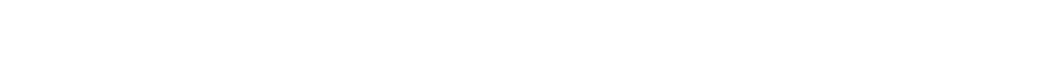

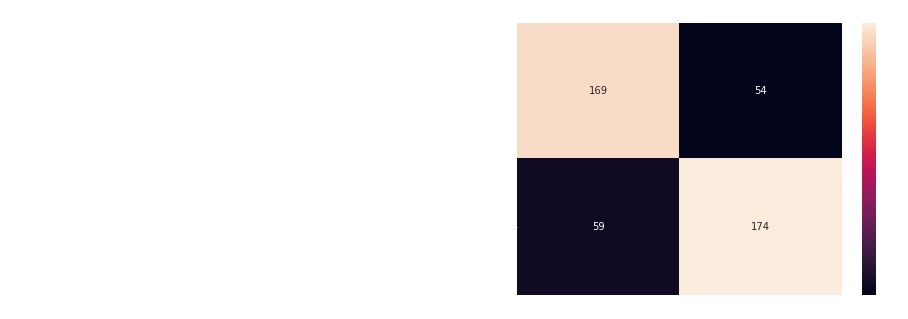

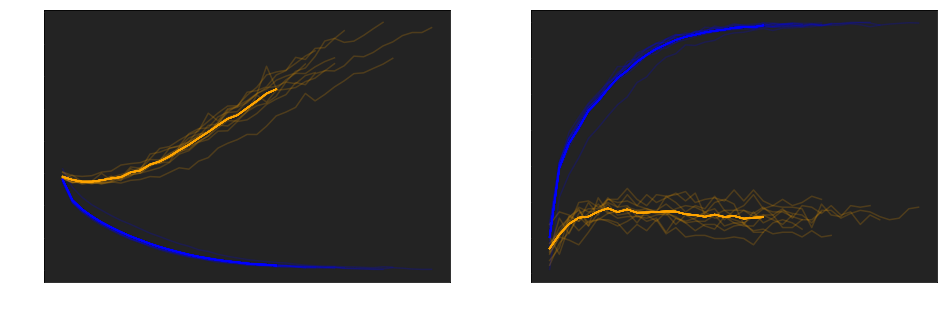

In [7]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('ANN - Retrospective Analysis', loadNetworkHistories('ann', 'retrospectiveAnalysis-AdaptiveNDNs'))

### CNN

In [8]:
from utils.dataLoading import loadRetrospectiveAnalysisData
from utils.training import trainCNN

for NDNs in [5, 10, 20, 50, 100, 'Adaptive']:
    print(f'{NDNs} NDNs')
    X_pos_train, X_neg_train, X_pos_test, X_neg_test = loadRetrospectiveAnalysisData(NDNs)
    
    trainCNN(X_pos_train, X_neg_train, f'retrospectiveAnalysis-{NDNs}NDNs', X_pos_test=X_pos_test, X_neg_test=X_neg_test)

5 NDNs
Training model 1 / 10
Train on 776 samples, validate on 82 samples
Epoch 1/1000
776/776 [==============================] - 8s 11ms/step - loss: 0.6713 - acc: 0.5838 - val_loss: 0.6681 - val_acc: 0.5244

Epoch 00001: val_acc improved from -inf to 0.52439, saving model to models/cnn_retrospectiveAnalysis-5NDNs_concat_0_0.h5
Epoch 2/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.5933 - acc: 0.7281 - val_loss: 0.6329 - val_acc: 0.6341

Epoch 00002: val_acc improved from 0.52439 to 0.63415, saving model to models/cnn_retrospectiveAnalysis-5NDNs_concat_0_0.h5
Epoch 3/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.5199 - acc: 0.7526 - val_loss: 0.6339 - val_acc: 0.6585

Epoch 00003: val_acc improved from 0.63415 to 0.65854, saving model to models/cnn_retrospectiveAnalysis-5NDNs_concat_0_0.h5
Epoch 4/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.4650 - acc: 0.7990 - val_loss: 0.5952 - val_acc: 0.7195

Epoch 00004: val

776/776 [==============================] - 2s 2ms/step - loss: 0.1233 - acc: 0.9536 - val_loss: 0.8904 - val_acc: 0.7439

Epoch 00017: val_acc did not improve from 0.75610
Epoch 18/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.1121 - acc: 0.9704 - val_loss: 0.8324 - val_acc: 0.7439

Epoch 00018: val_acc did not improve from 0.75610
Epoch 19/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.1095 - acc: 0.9652 - val_loss: 0.8408 - val_acc: 0.7317

Epoch 00019: val_acc did not improve from 0.75610
Epoch 20/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.0983 - acc: 0.9639 - val_loss: 0.9711 - val_acc: 0.7195

Epoch 00020: val_acc did not improve from 0.75610
Epoch 21/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.0937 - acc: 0.9665 - val_loss: 1.0863 - val_acc: 0.7439

Epoch 00021: val_acc did not improve from 0.75610
Epoch 22/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.0870 

776/776 [==============================] - 2s 3ms/step - loss: 0.0997 - acc: 0.9652 - val_loss: 0.6357 - val_acc: 0.7683

Epoch 00025: val_acc did not improve from 0.79268
Epoch 26/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.0874 - acc: 0.9742 - val_loss: 0.6728 - val_acc: 0.7805

Epoch 00026: val_acc did not improve from 0.79268
Epoch 27/1000
776/776 [==============================] - 2s 3ms/step - loss: 0.0914 - acc: 0.9742 - val_loss: 0.6363 - val_acc: 0.7561

Epoch 00027: val_acc did not improve from 0.79268
Epoch 28/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.0781 - acc: 0.9716 - val_loss: 0.6357 - val_acc: 0.8049

Epoch 00028: val_acc improved from 0.79268 to 0.80488, saving model to models/cnn_retrospectiveAnalysis-5NDNs_concat_0_4.h5
Epoch 29/1000
776/776 [==============================] - 2s 3ms/step - loss: 0.0797 - acc: 0.9742 - val_loss: 0.6959 - val_acc: 0.7805

Epoch 00029: val_acc did not improve from 0.80488
Epoch 30/1

776/776 [==============================] - 2s 2ms/step - loss: 0.1620 - acc: 0.9381 - val_loss: 0.7960 - val_acc: 0.7683

Epoch 00016: val_acc did not improve from 0.76829
Epoch 17/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.1542 - acc: 0.9369 - val_loss: 0.7018 - val_acc: 0.7317

Epoch 00017: val_acc did not improve from 0.76829
Epoch 18/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.1431 - acc: 0.9549 - val_loss: 0.7799 - val_acc: 0.7805

Epoch 00018: val_acc improved from 0.76829 to 0.78049, saving model to models/cnn_retrospectiveAnalysis-5NDNs_concat_0_6.h5
Epoch 19/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.1479 - acc: 0.9472 - val_loss: 0.7174 - val_acc: 0.7683

Epoch 00019: val_acc did not improve from 0.78049
Epoch 20/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.1382 - acc: 0.9472 - val_loss: 0.7716 - val_acc: 0.7683

Epoch 00020: val_acc did not improve from 0.78049
Epoch 21/1


Epoch 00019: val_acc did not improve from 0.79268
Epoch 20/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.1187 - acc: 0.9549 - val_loss: 0.7534 - val_acc: 0.7439

Epoch 00020: val_acc did not improve from 0.79268
Epoch 21/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.1170 - acc: 0.9575 - val_loss: 0.8314 - val_acc: 0.7805

Epoch 00021: val_acc did not improve from 0.79268
Epoch 22/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.1079 - acc: 0.9601 - val_loss: 0.8433 - val_acc: 0.7561

Epoch 00022: val_acc did not improve from 0.79268
Epoch 23/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.1067 - acc: 0.9626 - val_loss: 0.8434 - val_acc: 0.7683

Epoch 00023: val_acc did not improve from 0.79268
Epoch 24/1000
776/776 [==============================] - 2s 2ms/step - loss: 0.0994 - acc: 0.9639 - val_loss: 0.8104 - val_acc: 0.7317

Epoch 00024: val_acc did not improve from 0.79268
Epoch 25/1000
776/7


Epoch 00012: val_acc improved from 0.73295 to 0.73864, saving model to models/cnn_retrospectiveAnalysis-10NDNs_concat_0_0.h5
Epoch 13/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.2864 - acc: 0.8828 - val_loss: 0.6231 - val_acc: 0.7159

Epoch 00013: val_acc did not improve from 0.73864
Epoch 14/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.2717 - acc: 0.8945 - val_loss: 0.6120 - val_acc: 0.6989

Epoch 00014: val_acc did not improve from 0.73864
Epoch 15/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.2740 - acc: 0.8857 - val_loss: 0.6201 - val_acc: 0.7386

Epoch 00015: val_acc did not improve from 0.73864
Epoch 16/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.2641 - acc: 0.8945 - val_loss: 0.7446 - val_acc: 0.7045

Epoch 00016: val_acc did not improve from 0.73864
Epoch 17/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.2510 - acc: 0.8967 - val_loss: 0.6598 - v

Epoch 8/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.3109 - acc: 0.8654 - val_loss: 0.5324 - val_acc: 0.7670

Epoch 00008: val_acc improved from 0.75568 to 0.76705, saving model to models/cnn_retrospectiveAnalysis-10NDNs_concat_0_2.h5
Epoch 9/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.3056 - acc: 0.8690 - val_loss: 0.5269 - val_acc: 0.7386

Epoch 00009: val_acc did not improve from 0.76705
Epoch 10/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.2882 - acc: 0.8770 - val_loss: 0.5469 - val_acc: 0.7614

Epoch 00010: val_acc did not improve from 0.76705
Epoch 11/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.2780 - acc: 0.8879 - val_loss: 0.5317 - val_acc: 0.7670

Epoch 00011: val_acc did not improve from 0.76705
Epoch 12/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.2688 - acc: 0.8872 - val_loss: 0.5543 - val_acc: 0.7557

Epoch 00012: val_acc did not improve 

1374/1374 [==============================] - 3s 3ms/step - loss: 0.1059 - acc: 0.9571 - val_loss: 0.7777 - val_acc: 0.7614

Epoch 00050: val_acc did not improve from 0.78977
Epoch 51/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.1136 - acc: 0.9585 - val_loss: 0.7209 - val_acc: 0.7841

Epoch 00051: val_acc did not improve from 0.78977
Epoch 52/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.1102 - acc: 0.9527 - val_loss: 0.8050 - val_acc: 0.7614

Epoch 00052: val_acc did not improve from 0.78977
Epoch 53/1000
1374/1374 [==============================] - 3s 3ms/step - loss: 0.1020 - acc: 0.9578 - val_loss: 0.7897 - val_acc: 0.7614

Epoch 00053: val_acc did not improve from 0.78977
Epoch 54/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.1009 - acc: 0.9600 - val_loss: 0.9404 - val_acc: 0.7273

Epoch 00054: val_acc did not improve from 0.78977
Epoch 55/1000
1374/1374 [==============================] - 3s 2ms/step - l


Epoch 00012: val_acc did not improve from 0.75568
Epoch 13/1000
1374/1374 [==============================] - 4s 3ms/step - loss: 0.2970 - acc: 0.8763 - val_loss: 0.6505 - val_acc: 0.7216

Epoch 00013: val_acc did not improve from 0.75568
Epoch 14/1000
1374/1374 [==============================] - 4s 3ms/step - loss: 0.2905 - acc: 0.8741 - val_loss: 0.7096 - val_acc: 0.7273

Epoch 00014: val_acc did not improve from 0.75568
Epoch 15/1000
1374/1374 [==============================] - 4s 3ms/step - loss: 0.2763 - acc: 0.8828 - val_loss: 0.7813 - val_acc: 0.7386

Epoch 00015: val_acc did not improve from 0.75568
Epoch 16/1000
1374/1374 [==============================] - 4s 3ms/step - loss: 0.2698 - acc: 0.8857 - val_loss: 0.7313 - val_acc: 0.7443

Epoch 00016: val_acc did not improve from 0.75568
Epoch 17/1000
1374/1374 [==============================] - 4s 3ms/step - loss: 0.2720 - acc: 0.8872 - val_loss: 0.7158 - val_acc: 0.7159

Epoch 00017: val_acc did not improve from 0.75568
Epoch 18/


Epoch 00027: val_acc did not improve from 0.77841
Epoch 28/1000
1374/1374 [==============================] - 4s 3ms/step - loss: 0.1883 - acc: 0.9214 - val_loss: 0.6997 - val_acc: 0.7500

Epoch 00028: val_acc did not improve from 0.77841
Epoch 29/1000
1374/1374 [==============================] - 4s 3ms/step - loss: 0.1751 - acc: 0.9360 - val_loss: 0.6826 - val_acc: 0.7614

Epoch 00029: val_acc did not improve from 0.77841
Epoch 30/1000
1374/1374 [==============================] - 4s 3ms/step - loss: 0.1811 - acc: 0.9272 - val_loss: 0.6778 - val_acc: 0.7670

Epoch 00030: val_acc did not improve from 0.77841
Epoch 31/1000
1374/1374 [==============================] - 4s 3ms/step - loss: 0.1700 - acc: 0.9309 - val_loss: 0.7146 - val_acc: 0.7557

Epoch 00031: val_acc did not improve from 0.77841
Epoch 32/1000
1374/1374 [==============================] - 4s 3ms/step - loss: 0.1657 - acc: 0.9396 - val_loss: 0.6905 - val_acc: 0.7500

Epoch 00032: val_acc did not improve from 0.77841
Epoch 33/

Training model 10 / 10
Train on 1374 samples, validate on 176 samples
Epoch 1/1000
1374/1374 [==============================] - 13s 10ms/step - loss: 0.6309 - acc: 0.6252 - val_loss: 0.6393 - val_acc: 0.6307

Epoch 00001: val_acc improved from -inf to 0.63068, saving model to models/cnn_retrospectiveAnalysis-10NDNs_concat_0_9.h5
Epoch 2/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.5150 - acc: 0.7606 - val_loss: 0.6104 - val_acc: 0.6307

Epoch 00002: val_acc did not improve from 0.63068
Epoch 3/1000
1374/1374 [==============================] - 3s 2ms/step - loss: 0.4636 - acc: 0.7838 - val_loss: 0.6094 - val_acc: 0.6932

Epoch 00003: val_acc improved from 0.63068 to 0.69318, saving model to models/cnn_retrospectiveAnalysis-10NDNs_concat_0_9.h5
Epoch 4/1000
1374/1374 [==============================] - 3s 3ms/step - loss: 0.4234 - acc: 0.8086 - val_loss: 0.6164 - val_acc: 0.6534

Epoch 00004: val_acc did not improve from 0.69318
Epoch 5/1000
1374/1374 [=========


Epoch 00006: val_acc did not improve from 0.73214
Epoch 7/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.3913 - acc: 0.8312 - val_loss: 0.5503 - val_acc: 0.7351

Epoch 00007: val_acc improved from 0.73214 to 0.73512, saving model to models/cnn_retrospectiveAnalysis-20NDNs_concat_0_1.h5
Epoch 8/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.3794 - acc: 0.8307 - val_loss: 0.5821 - val_acc: 0.6935

Epoch 00008: val_acc did not improve from 0.73512
Epoch 9/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.3681 - acc: 0.8338 - val_loss: 0.5435 - val_acc: 0.7470

Epoch 00009: val_acc improved from 0.73512 to 0.74702, saving model to models/cnn_retrospectiveAnalysis-20NDNs_concat_0_1.h5
Epoch 10/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.3498 - acc: 0.8488 - val_loss: 0.5721 - val_acc: 0.7262

Epoch 00010: val_acc did not improve from 0.74702
Epoch 11/1000
2322/2322 [=========================


Epoch 00013: val_acc did not improve from 0.74702
Epoch 14/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.2952 - acc: 0.8730 - val_loss: 0.5960 - val_acc: 0.7292

Epoch 00014: val_acc did not improve from 0.74702
Epoch 15/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.2893 - acc: 0.8777 - val_loss: 0.5934 - val_acc: 0.7500

Epoch 00015: val_acc improved from 0.74702 to 0.75000, saving model to models/cnn_retrospectiveAnalysis-20NDNs_concat_0_2.h5
Epoch 16/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.2808 - acc: 0.8764 - val_loss: 0.6242 - val_acc: 0.7440

Epoch 00016: val_acc did not improve from 0.75000
Epoch 17/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.2719 - acc: 0.8798 - val_loss: 0.6308 - val_acc: 0.7440

Epoch 00017: val_acc did not improve from 0.75000
Epoch 18/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.2679 - acc: 0.8863 - val_loss: 0.6233 - v


Epoch 00055: val_acc did not improve from 0.76488
Epoch 56/1000
2322/2322 [==============================] - 6s 2ms/step - loss: 0.0910 - acc: 0.9690 - val_loss: 1.1222 - val_acc: 0.7560

Epoch 00056: val_acc did not improve from 0.76488
Epoch 57/1000
2322/2322 [==============================] - 6s 2ms/step - loss: 0.0875 - acc: 0.9699 - val_loss: 1.1175 - val_acc: 0.7500

Epoch 00057: val_acc did not improve from 0.76488
Epoch 58/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.0850 - acc: 0.9681 - val_loss: 1.1756 - val_acc: 0.7470

Epoch 00058: val_acc did not improve from 0.76488
Epoch 59/1000
2322/2322 [==============================] - 6s 2ms/step - loss: 0.0833 - acc: 0.9690 - val_loss: 1.1763 - val_acc: 0.7619

Epoch 00059: val_acc did not improve from 0.76488
Epoch 60/1000
2322/2322 [==============================] - 6s 2ms/step - loss: 0.0815 - acc: 0.9681 - val_loss: 1.0960 - val_acc: 0.7470

Epoch 00060: val_acc did not improve from 0.76488
Epoch 61/


Epoch 00035: val_acc did not improve from 0.74702
Epoch 36/1000
2322/2322 [==============================] - 6s 2ms/step - loss: 0.1874 - acc: 0.9173 - val_loss: 0.9804 - val_acc: 0.7232

Epoch 00036: val_acc did not improve from 0.74702
Epoch 00036: early stopping
Training model 5 / 10
Train on 2322 samples, validate on 336 samples
Epoch 1/1000
2322/2322 [==============================] - 17s 7ms/step - loss: 0.5906 - acc: 0.6748 - val_loss: 0.5695 - val_acc: 0.6756

Epoch 00001: val_acc improved from -inf to 0.67560, saving model to models/cnn_retrospectiveAnalysis-20NDNs_concat_0_4.h5
Epoch 2/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.4973 - acc: 0.7627 - val_loss: 0.5580 - val_acc: 0.6994

Epoch 00002: val_acc improved from 0.67560 to 0.69940, saving model to models/cnn_retrospectiveAnalysis-20NDNs_concat_0_4.h5
Epoch 3/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.4520 - acc: 0.7954 - val_loss: 0.5530 - val_acc: 0.7321

Epoch

2322/2322 [==============================] - 6s 3ms/step - loss: 0.0969 - acc: 0.9681 - val_loss: 1.0343 - val_acc: 0.7321

Epoch 00040: val_acc did not improve from 0.75595
Epoch 41/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.1014 - acc: 0.9604 - val_loss: 1.0804 - val_acc: 0.7113

Epoch 00041: val_acc did not improve from 0.75595
Epoch 42/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.0946 - acc: 0.9647 - val_loss: 1.0541 - val_acc: 0.7321

Epoch 00042: val_acc did not improve from 0.75595
Epoch 00042: early stopping
Training model 6 / 10
Train on 2322 samples, validate on 336 samples
Epoch 1/1000
2322/2322 [==============================] - 17s 7ms/step - loss: 0.5970 - acc: 0.6753 - val_loss: 0.5780 - val_acc: 0.7113

Epoch 00001: val_acc improved from -inf to 0.71131, saving model to models/cnn_retrospectiveAnalysis-20NDNs_concat_0_5.h5
Epoch 2/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.4925 - acc: 0

2322/2322 [==============================] - 6s 3ms/step - loss: 0.1751 - acc: 0.9246 - val_loss: 0.8754 - val_acc: 0.7470

Epoch 00038: val_acc did not improve from 0.75595
Epoch 39/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.1627 - acc: 0.9332 - val_loss: 0.8257 - val_acc: 0.7470

Epoch 00039: val_acc did not improve from 0.75595
Epoch 40/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.1589 - acc: 0.9384 - val_loss: 0.8500 - val_acc: 0.7440

Epoch 00040: val_acc did not improve from 0.75595
Epoch 41/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.1582 - acc: 0.9354 - val_loss: 0.8485 - val_acc: 0.7470

Epoch 00041: val_acc did not improve from 0.75595
Epoch 42/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.1509 - acc: 0.9414 - val_loss: 0.8504 - val_acc: 0.7530

Epoch 00042: val_acc did not improve from 0.75595
Epoch 43/1000
2322/2322 [==============================] - 6s 3ms/step - l

2322/2322 [==============================] - 6s 3ms/step - loss: 0.1905 - acc: 0.9302 - val_loss: 0.7569 - val_acc: 0.7500

Epoch 00035: val_acc did not improve from 0.77083
Epoch 00035: early stopping
Training model 8 / 10
Train on 2322 samples, validate on 336 samples
Epoch 1/1000
2322/2322 [==============================] - 17s 7ms/step - loss: 0.6281 - acc: 0.6520 - val_loss: 0.6192 - val_acc: 0.6131

Epoch 00001: val_acc improved from -inf to 0.61310, saving model to models/cnn_retrospectiveAnalysis-20NDNs_concat_0_7.h5
Epoch 2/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.5317 - acc: 0.7407 - val_loss: 0.5774 - val_acc: 0.7232

Epoch 00002: val_acc improved from 0.61310 to 0.72321, saving model to models/cnn_retrospectiveAnalysis-20NDNs_concat_0_7.h5
Epoch 3/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.4948 - acc: 0.7550 - val_loss: 0.5667 - val_acc: 0.7143

Epoch 00003: val_acc did not improve from 0.72321
Epoch 4/1000
2322/23

2322/2322 [==============================] - 6s 3ms/step - loss: 0.2465 - acc: 0.8945 - val_loss: 0.6769 - val_acc: 0.7381

Epoch 00041: val_acc did not improve from 0.75893
Epoch 42/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.2435 - acc: 0.8975 - val_loss: 0.6744 - val_acc: 0.7351

Epoch 00042: val_acc did not improve from 0.75893
Epoch 43/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.2380 - acc: 0.9035 - val_loss: 0.6462 - val_acc: 0.7500

Epoch 00043: val_acc did not improve from 0.75893
Epoch 44/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.2335 - acc: 0.9035 - val_loss: 0.6620 - val_acc: 0.7470

Epoch 00044: val_acc did not improve from 0.75893
Epoch 00044: early stopping
Training model 9 / 10
Train on 2322 samples, validate on 336 samples
Epoch 1/1000
2322/2322 [==============================] - 17s 7ms/step - loss: 0.6053 - acc: 0.6710 - val_loss: 0.5833 - val_acc: 0.7113

Epoch 00001: val_acc improv

2322/2322 [==============================] - 6s 2ms/step - loss: 0.2101 - acc: 0.9139 - val_loss: 0.7542 - val_acc: 0.7321

Epoch 00038: val_acc did not improve from 0.75595
Epoch 39/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.2057 - acc: 0.9173 - val_loss: 0.7172 - val_acc: 0.7411

Epoch 00039: val_acc did not improve from 0.75595
Epoch 40/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.1998 - acc: 0.9212 - val_loss: 0.7395 - val_acc: 0.7411

Epoch 00040: val_acc did not improve from 0.75595
Epoch 41/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.2018 - acc: 0.9152 - val_loss: 0.7380 - val_acc: 0.7381

Epoch 00041: val_acc did not improve from 0.75595
Epoch 42/1000
2322/2322 [==============================] - 6s 3ms/step - loss: 0.1943 - acc: 0.9208 - val_loss: 0.7569 - val_acc: 0.7262

Epoch 00042: val_acc did not improve from 0.75595
Epoch 43/1000
2322/2322 [==============================] - 6s 3ms/step - l


Epoch 00024: val_acc did not improve from 0.76786
Epoch 25/1000
2322/2322 [==============================] - 7s 3ms/step - loss: 0.1919 - acc: 0.9203 - val_loss: 0.7023 - val_acc: 0.7351

Epoch 00025: val_acc did not improve from 0.76786
Epoch 26/1000
2322/2322 [==============================] - 7s 3ms/step - loss: 0.1842 - acc: 0.9255 - val_loss: 0.6904 - val_acc: 0.7411

Epoch 00026: val_acc did not improve from 0.76786
Epoch 27/1000
2322/2322 [==============================] - 7s 3ms/step - loss: 0.1793 - acc: 0.9220 - val_loss: 0.7221 - val_acc: 0.7560

Epoch 00027: val_acc did not improve from 0.76786
Epoch 28/1000
2322/2322 [==============================] - 7s 3ms/step - loss: 0.1744 - acc: 0.9242 - val_loss: 0.7378 - val_acc: 0.7560

Epoch 00028: val_acc did not improve from 0.76786
Epoch 29/1000
2322/2322 [==============================] - 7s 3ms/step - loss: 0.1673 - acc: 0.9384 - val_loss: 0.7768 - val_acc: 0.7500

Epoch 00029: val_acc did not improve from 0.76786
Epoch 30/

4622/4622 [==============================] - 14s 3ms/step - loss: 0.2817 - acc: 0.8745 - val_loss: 0.5975 - val_acc: 0.7388

Epoch 00025: val_acc did not improve from 0.75871
Epoch 26/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2766 - acc: 0.8711 - val_loss: 0.6061 - val_acc: 0.7500

Epoch 00026: val_acc did not improve from 0.75871
Epoch 27/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2722 - acc: 0.8795 - val_loss: 0.6083 - val_acc: 0.7488

Epoch 00027: val_acc did not improve from 0.75871
Epoch 28/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2660 - acc: 0.8823 - val_loss: 0.6356 - val_acc: 0.7463

Epoch 00028: val_acc did not improve from 0.75871
Epoch 29/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2633 - acc: 0.8808 - val_loss: 0.6247 - val_acc: 0.7600

Epoch 00029: val_acc improved from 0.75871 to 0.75995, saving model to models/cnn_retrospectiveAnalysis-50NDNs_concat_0

4622/4622 [==============================] - 13s 3ms/step - loss: 0.3570 - acc: 0.8332 - val_loss: 0.5099 - val_acc: 0.7463

Epoch 00009: val_acc did not improve from 0.75622
Epoch 10/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.3430 - acc: 0.8464 - val_loss: 0.5162 - val_acc: 0.7450

Epoch 00010: val_acc did not improve from 0.75622
Epoch 11/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.3378 - acc: 0.8453 - val_loss: 0.5803 - val_acc: 0.7351

Epoch 00011: val_acc did not improve from 0.75622
Epoch 12/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.3262 - acc: 0.8511 - val_loss: 0.5152 - val_acc: 0.7512

Epoch 00012: val_acc did not improve from 0.75622
Epoch 13/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.3162 - acc: 0.8544 - val_loss: 0.5593 - val_acc: 0.7425

Epoch 00013: val_acc did not improve from 0.75622
Epoch 14/1000
4622/4622 [==============================] - 13s 3ms/st

4622/4622 [==============================] - 13s 3ms/step - loss: 0.2704 - acc: 0.8760 - val_loss: 0.6073 - val_acc: 0.7562

Epoch 00024: val_acc did not improve from 0.75622
Epoch 25/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.2563 - acc: 0.8849 - val_loss: 0.6399 - val_acc: 0.7488

Epoch 00025: val_acc did not improve from 0.75622
Epoch 26/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.2549 - acc: 0.8840 - val_loss: 0.6393 - val_acc: 0.7450

Epoch 00026: val_acc did not improve from 0.75622
Epoch 27/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.2452 - acc: 0.8905 - val_loss: 0.6511 - val_acc: 0.7512

Epoch 00027: val_acc did not improve from 0.75622
Epoch 28/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.2443 - acc: 0.8881 - val_loss: 0.6469 - val_acc: 0.7525

Epoch 00028: val_acc did not improve from 0.75622
Epoch 29/1000
4622/4622 [==============================] - 13s 3ms/st

4622/4622 [==============================] - 13s 3ms/step - loss: 0.1011 - acc: 0.9574 - val_loss: 1.0744 - val_acc: 0.7550

Epoch 00065: val_acc did not improve from 0.77239
Epoch 66/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.0911 - acc: 0.9628 - val_loss: 1.0946 - val_acc: 0.7662

Epoch 00066: val_acc did not improve from 0.77239
Epoch 67/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.0890 - acc: 0.9656 - val_loss: 1.1176 - val_acc: 0.7674

Epoch 00067: val_acc did not improve from 0.77239
Epoch 68/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.0855 - acc: 0.9656 - val_loss: 1.1254 - val_acc: 0.7550

Epoch 00068: val_acc did not improve from 0.77239
Epoch 69/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.0818 - acc: 0.9688 - val_loss: 1.1310 - val_acc: 0.7699

Epoch 00069: val_acc did not improve from 0.77239
Epoch 70/1000
4622/4622 [==============================] - 13s 3ms/st

4622/4622 [==============================] - 14s 3ms/step - loss: 0.2771 - acc: 0.8762 - val_loss: 0.6186 - val_acc: 0.7425

Epoch 00031: val_acc did not improve from 0.75249
Epoch 32/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2663 - acc: 0.8875 - val_loss: 0.6264 - val_acc: 0.7500

Epoch 00032: val_acc did not improve from 0.75249
Epoch 33/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2684 - acc: 0.8842 - val_loss: 0.6277 - val_acc: 0.7425

Epoch 00033: val_acc did not improve from 0.75249
Epoch 34/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2627 - acc: 0.8860 - val_loss: 0.6345 - val_acc: 0.7463

Epoch 00034: val_acc did not improve from 0.75249
Epoch 35/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2578 - acc: 0.8860 - val_loss: 0.6426 - val_acc: 0.7475

Epoch 00035: val_acc did not improve from 0.75249
Epoch 36/1000
4622/4622 [==============================] - 14s 3ms/st


Epoch 00015: val_acc did not improve from 0.74627
Epoch 16/1000
4622/4622 [==============================] - 13s 3ms/step - loss: 0.3613 - acc: 0.8384 - val_loss: 0.5616 - val_acc: 0.7351

Epoch 00016: val_acc did not improve from 0.74627
Epoch 17/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.3579 - acc: 0.8356 - val_loss: 0.5370 - val_acc: 0.7388

Epoch 00017: val_acc did not improve from 0.74627
Epoch 18/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.3533 - acc: 0.8367 - val_loss: 0.5437 - val_acc: 0.7400

Epoch 00018: val_acc did not improve from 0.74627
Epoch 19/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.3496 - acc: 0.8425 - val_loss: 0.5546 - val_acc: 0.7326

Epoch 00019: val_acc did not improve from 0.74627
Epoch 20/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.3423 - acc: 0.8429 - val_loss: 0.5503 - val_acc: 0.7388

Epoch 00020: val_acc did not improve from 0.74627
Epoc

4622/4622 [==============================] - 14s 3ms/step - loss: 0.2461 - acc: 0.8884 - val_loss: 0.6536 - val_acc: 0.7438

Epoch 00027: val_acc did not improve from 0.75000
Epoch 28/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2386 - acc: 0.8972 - val_loss: 0.6829 - val_acc: 0.7463

Epoch 00028: val_acc did not improve from 0.75000
Epoch 29/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2370 - acc: 0.8964 - val_loss: 0.6704 - val_acc: 0.7500

Epoch 00029: val_acc did not improve from 0.75000
Epoch 30/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2291 - acc: 0.9016 - val_loss: 0.6833 - val_acc: 0.7525

Epoch 00030: val_acc improved from 0.75000 to 0.75249, saving model to models/cnn_retrospectiveAnalysis-50NDNs_concat_0_7.h5
Epoch 31/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.2242 - acc: 0.9026 - val_loss: 0.6989 - val_acc: 0.7363

Epoch 00031: val_acc did not improve from 0.


Epoch 00009: val_acc improved from 0.74751 to 0.74876, saving model to models/cnn_retrospectiveAnalysis-50NDNs_concat_0_8.h5
Epoch 10/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.3696 - acc: 0.8304 - val_loss: 0.5179 - val_acc: 0.7463

Epoch 00010: val_acc did not improve from 0.74876
Epoch 11/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.3601 - acc: 0.8375 - val_loss: 0.5176 - val_acc: 0.7512

Epoch 00011: val_acc improved from 0.74876 to 0.75124, saving model to models/cnn_retrospectiveAnalysis-50NDNs_concat_0_8.h5
Epoch 12/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.3510 - acc: 0.8373 - val_loss: 0.5245 - val_acc: 0.7425

Epoch 00012: val_acc did not improve from 0.75124
Epoch 13/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.3462 - acc: 0.8375 - val_loss: 0.5305 - val_acc: 0.7413

Epoch 00013: val_acc did not improve from 0.75124
Epoch 14/1000
4622/4622 [==================


Epoch 00050: val_acc did not improve from 0.76368
Epoch 51/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.1312 - acc: 0.9485 - val_loss: 0.8725 - val_acc: 0.7637

Epoch 00051: val_acc did not improve from 0.76368
Epoch 52/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.1233 - acc: 0.9498 - val_loss: 0.8944 - val_acc: 0.7388

Epoch 00052: val_acc did not improve from 0.76368
Epoch 53/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.1180 - acc: 0.9556 - val_loss: 0.8982 - val_acc: 0.7575

Epoch 00053: val_acc did not improve from 0.76368
Epoch 54/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.1143 - acc: 0.9550 - val_loss: 0.9334 - val_acc: 0.7512

Epoch 00054: val_acc did not improve from 0.76368
Epoch 55/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.1136 - acc: 0.9600 - val_loss: 0.9688 - val_acc: 0.7575

Epoch 00055: val_acc did not improve from 0.76368
Epoc

4622/4622 [==============================] - 14s 3ms/step - loss: 0.1526 - acc: 0.9368 - val_loss: 0.7976 - val_acc: 0.7488

Epoch 00054: val_acc did not improve from 0.76119
Epoch 55/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.1446 - acc: 0.9416 - val_loss: 0.8957 - val_acc: 0.7550

Epoch 00055: val_acc did not improve from 0.76119
Epoch 56/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.1435 - acc: 0.9444 - val_loss: 0.8301 - val_acc: 0.7537

Epoch 00056: val_acc did not improve from 0.76119
Epoch 57/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.1367 - acc: 0.9446 - val_loss: 0.8593 - val_acc: 0.7463

Epoch 00057: val_acc did not improve from 0.76119
Epoch 58/1000
4622/4622 [==============================] - 14s 3ms/step - loss: 0.1320 - acc: 0.9489 - val_loss: 0.8895 - val_acc: 0.7674

Epoch 00058: val_acc improved from 0.76119 to 0.76741, saving model to models/cnn_retrospectiveAnalysis-50NDNs_concat_0


Epoch 00016: val_acc did not improve from 0.76115
Epoch 17/1000
7586/7586 [==============================] - 23s 3ms/step - loss: 0.2980 - acc: 0.8662 - val_loss: 0.6099 - val_acc: 0.7467

Epoch 00017: val_acc did not improve from 0.76115
Epoch 18/1000
7586/7586 [==============================] - 23s 3ms/step - loss: 0.2885 - acc: 0.8723 - val_loss: 0.6237 - val_acc: 0.7388

Epoch 00018: val_acc did not improve from 0.76115
Epoch 19/1000
7586/7586 [==============================] - 23s 3ms/step - loss: 0.2732 - acc: 0.8785 - val_loss: 0.6493 - val_acc: 0.7375

Epoch 00019: val_acc did not improve from 0.76115
Epoch 20/1000
7586/7586 [==============================] - 23s 3ms/step - loss: 0.2658 - acc: 0.8831 - val_loss: 0.6474 - val_acc: 0.7402

Epoch 00020: val_acc did not improve from 0.76115
Epoch 21/1000
7586/7586 [==============================] - 23s 3ms/step - loss: 0.2529 - acc: 0.8906 - val_loss: 0.6590 - val_acc: 0.7480

Epoch 00021: val_acc did not improve from 0.76115
Epoc


Epoch 00027: val_acc did not improve from 0.76903
Epoch 00027: early stopping
Training model 3 / 10
Train on 7586 samples, validate on 762 samples
Epoch 1/1000
7586/7586 [==============================] - 37s 5ms/step - loss: 0.5593 - acc: 0.7025 - val_loss: 0.5612 - val_acc: 0.7113

Epoch 00001: val_acc improved from -inf to 0.71129, saving model to models/cnn_retrospectiveAnalysis-100NDNs_concat_0_2.h5
Epoch 2/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.4945 - acc: 0.7532 - val_loss: 0.5111 - val_acc: 0.7612

Epoch 00002: val_acc improved from 0.71129 to 0.76115, saving model to models/cnn_retrospectiveAnalysis-100NDNs_concat_0_2.h5
Epoch 3/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.4680 - acc: 0.7748 - val_loss: 0.5157 - val_acc: 0.7559

Epoch 00003: val_acc did not improve from 0.76115
Epoch 4/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.4491 - acc: 0.7799 - val_loss: 0.5188 - val_acc: 0.7585

E

7586/7586 [==============================] - 24s 3ms/step - loss: 0.3180 - acc: 0.8546 - val_loss: 0.6310 - val_acc: 0.7441

Epoch 00013: val_acc did not improve from 0.76378
Epoch 14/1000
7586/7586 [==============================] - 25s 3ms/step - loss: 0.3132 - acc: 0.8595 - val_loss: 0.6209 - val_acc: 0.7559

Epoch 00014: val_acc did not improve from 0.76378
Epoch 15/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.2952 - acc: 0.8670 - val_loss: 0.6594 - val_acc: 0.7467

Epoch 00015: val_acc did not improve from 0.76378
Epoch 16/1000
7586/7586 [==============================] - 25s 3ms/step - loss: 0.2889 - acc: 0.8740 - val_loss: 0.6821 - val_acc: 0.7428

Epoch 00016: val_acc did not improve from 0.76378
Epoch 17/1000
7586/7586 [==============================] - 25s 3ms/step - loss: 0.2775 - acc: 0.8785 - val_loss: 0.6852 - val_acc: 0.7362

Epoch 00017: val_acc did not improve from 0.76378
Epoch 18/1000
7586/7586 [==============================] - 25s 3ms/st


Epoch 00011: val_acc did not improve from 0.76772
Epoch 12/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.3863 - acc: 0.8187 - val_loss: 0.5706 - val_acc: 0.7297

Epoch 00012: val_acc did not improve from 0.76772
Epoch 13/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.3808 - acc: 0.8219 - val_loss: 0.5509 - val_acc: 0.7415

Epoch 00013: val_acc did not improve from 0.76772
Epoch 14/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.3733 - acc: 0.8299 - val_loss: 0.5508 - val_acc: 0.7559

Epoch 00014: val_acc did not improve from 0.76772
Epoch 15/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.3627 - acc: 0.8336 - val_loss: 0.5485 - val_acc: 0.7520

Epoch 00015: val_acc did not improve from 0.76772
Epoch 16/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.3583 - acc: 0.8313 - val_loss: 0.5516 - val_acc: 0.7598

Epoch 00016: val_acc did not improve from 0.76772
Epoc

7586/7586 [==============================] - 24s 3ms/step - loss: 0.1289 - acc: 0.9514 - val_loss: 1.0298 - val_acc: 0.7874

Epoch 00053: val_acc did not improve from 0.79790
Epoch 54/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.1257 - acc: 0.9525 - val_loss: 1.0342 - val_acc: 0.7848

Epoch 00054: val_acc did not improve from 0.79790
Epoch 55/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.1192 - acc: 0.9545 - val_loss: 1.0560 - val_acc: 0.7848

Epoch 00055: val_acc did not improve from 0.79790
Epoch 56/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.1187 - acc: 0.9535 - val_loss: 1.0710 - val_acc: 0.7795

Epoch 00056: val_acc did not improve from 0.79790
Epoch 57/1000
7586/7586 [==============================] - 25s 3ms/step - loss: 0.1124 - acc: 0.9579 - val_loss: 1.0871 - val_acc: 0.7822

Epoch 00057: val_acc did not improve from 0.79790
Epoch 58/1000
7586/7586 [==============================] - 24s 3ms/st


Epoch 00022: val_acc did not improve from 0.74016
Epoch 23/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.3358 - acc: 0.8452 - val_loss: 0.6385 - val_acc: 0.7100

Epoch 00023: val_acc did not improve from 0.74016
Epoch 24/1000
7586/7586 [==============================] - 23s 3ms/step - loss: 0.3319 - acc: 0.8467 - val_loss: 0.6318 - val_acc: 0.7178

Epoch 00024: val_acc did not improve from 0.74016
Epoch 25/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.3281 - acc: 0.8553 - val_loss: 0.6190 - val_acc: 0.7178

Epoch 00025: val_acc did not improve from 0.74016
Epoch 26/1000
7586/7586 [==============================] - 23s 3ms/step - loss: 0.3233 - acc: 0.8514 - val_loss: 0.6089 - val_acc: 0.7310

Epoch 00026: val_acc did not improve from 0.74016
Epoch 27/1000
7586/7586 [==============================] - 23s 3ms/step - loss: 0.3160 - acc: 0.8564 - val_loss: 0.6472 - val_acc: 0.7297

Epoch 00027: val_acc did not improve from 0.74016
Epoc

7586/7586 [==============================] - 24s 3ms/step - loss: 0.2240 - acc: 0.9030 - val_loss: 0.6909 - val_acc: 0.7546

Epoch 00041: val_acc did not improve from 0.76640
Epoch 42/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.2207 - acc: 0.9080 - val_loss: 0.6893 - val_acc: 0.7507

Epoch 00042: val_acc did not improve from 0.76640
Epoch 43/1000
7586/7586 [==============================] - 25s 3ms/step - loss: 0.2135 - acc: 0.9133 - val_loss: 0.7092 - val_acc: 0.7638

Epoch 00043: val_acc did not improve from 0.76640
Epoch 44/1000
7586/7586 [==============================] - 25s 3ms/step - loss: 0.2110 - acc: 0.9123 - val_loss: 0.7208 - val_acc: 0.7572

Epoch 00044: val_acc did not improve from 0.76640
Epoch 45/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.2069 - acc: 0.9166 - val_loss: 0.7234 - val_acc: 0.7454

Epoch 00045: val_acc did not improve from 0.76640
Epoch 46/1000
7586/7586 [==============================] - 25s 3ms/st

7586/7586 [==============================] - 24s 3ms/step - loss: 0.4462 - acc: 0.7861 - val_loss: 0.6120 - val_acc: 0.6929

Epoch 00004: val_acc did not improve from 0.73360
Epoch 5/1000
7586/7586 [==============================] - 25s 3ms/step - loss: 0.4311 - acc: 0.7938 - val_loss: 0.6466 - val_acc: 0.6982

Epoch 00005: val_acc did not improve from 0.73360
Epoch 6/1000
7586/7586 [==============================] - 25s 3ms/step - loss: 0.4184 - acc: 0.8012 - val_loss: 0.5805 - val_acc: 0.7323

Epoch 00006: val_acc did not improve from 0.73360
Epoch 7/1000
7586/7586 [==============================] - 25s 3ms/step - loss: 0.4070 - acc: 0.8086 - val_loss: 0.5495 - val_acc: 0.7349

Epoch 00007: val_acc improved from 0.73360 to 0.73491, saving model to models/cnn_retrospectiveAnalysis-100NDNs_concat_0_9.h5
Epoch 8/1000
7586/7586 [==============================] - 24s 3ms/step - loss: 0.3948 - acc: 0.8161 - val_loss: 0.5949 - val_acc: 0.7244

Epoch 00008: val_acc did not improve from 0.734


Epoch 00010: val_acc did not improve from 0.73581
Epoch 11/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.3459 - acc: 0.8435 - val_loss: 0.5521 - val_acc: 0.7271

Epoch 00011: val_acc did not improve from 0.73581
Epoch 12/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.3341 - acc: 0.8449 - val_loss: 0.5495 - val_acc: 0.7424

Epoch 00012: val_acc improved from 0.73581 to 0.74236, saving model to models/cnn_retrospectiveAnalysis-AdaptiveNDNs_concat_0_0.h5
Epoch 13/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.3243 - acc: 0.8534 - val_loss: 0.5607 - val_acc: 0.7314

Epoch 00013: val_acc did not improve from 0.74236
Epoch 14/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.3160 - acc: 0.8610 - val_loss: 0.5982 - val_acc: 0.7074

Epoch 00014: val_acc did not improve from 0.74236
Epoch 15/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.3062 - acc: 0.8700 - val_loss: 0.57

2108/2108 [==============================] - 7s 3ms/step - loss: 0.3133 - acc: 0.8582 - val_loss: 0.6232 - val_acc: 0.7031

Epoch 00014: val_acc did not improve from 0.70742
Epoch 15/1000
2108/2108 [==============================] - 7s 4ms/step - loss: 0.3055 - acc: 0.8643 - val_loss: 0.6044 - val_acc: 0.7140

Epoch 00015: val_acc improved from 0.70742 to 0.71397, saving model to models/cnn_retrospectiveAnalysis-AdaptiveNDNs_concat_0_1.h5
Epoch 16/1000
2108/2108 [==============================] - 7s 4ms/step - loss: 0.2971 - acc: 0.8657 - val_loss: 0.5985 - val_acc: 0.7205

Epoch 00016: val_acc improved from 0.71397 to 0.72052, saving model to models/cnn_retrospectiveAnalysis-AdaptiveNDNs_concat_0_1.h5
Epoch 17/1000
2108/2108 [==============================] - 8s 4ms/step - loss: 0.2885 - acc: 0.8700 - val_loss: 0.6046 - val_acc: 0.7249

Epoch 00017: val_acc improved from 0.72052 to 0.72489, saving model to models/cnn_retrospectiveAnalysis-AdaptiveNDNs_concat_0_1.h5
Epoch 18/1000
2108/

2108/2108 [==============================] - 7s 3ms/step - loss: 0.2025 - acc: 0.9118 - val_loss: 0.8132 - val_acc: 0.7271

Epoch 00030: val_acc did not improve from 0.73581
Epoch 31/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.1912 - acc: 0.9198 - val_loss: 0.8306 - val_acc: 0.7205

Epoch 00031: val_acc did not improve from 0.73581
Epoch 32/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.1900 - acc: 0.9170 - val_loss: 0.8358 - val_acc: 0.7205

Epoch 00032: val_acc did not improve from 0.73581
Epoch 33/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.1883 - acc: 0.9198 - val_loss: 0.8684 - val_acc: 0.7314

Epoch 00033: val_acc did not improve from 0.73581
Epoch 34/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.1831 - acc: 0.9213 - val_loss: 0.8450 - val_acc: 0.7227

Epoch 00034: val_acc did not improve from 0.73581
Epoch 00034: early stopping
Training model 4 / 10
Train on 2108 samples, v

2108/2108 [==============================] - 7s 3ms/step - loss: 0.2044 - acc: 0.9118 - val_loss: 0.7407 - val_acc: 0.7293

Epoch 00036: val_acc did not improve from 0.73581
Epoch 37/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.2038 - acc: 0.9179 - val_loss: 0.7505 - val_acc: 0.6987

Epoch 00037: val_acc did not improve from 0.73581
Epoch 38/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.1995 - acc: 0.9113 - val_loss: 0.7726 - val_acc: 0.6943

Epoch 00038: val_acc did not improve from 0.73581
Epoch 39/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.1846 - acc: 0.9279 - val_loss: 0.8195 - val_acc: 0.6943

Epoch 00039: val_acc did not improve from 0.73581
Epoch 00039: early stopping
Training model 5 / 10
Train on 2108 samples, validate on 458 samples
Epoch 1/1000
2108/2108 [==============================] - 23s 11ms/step - loss: 0.5894 - acc: 0.6741 - val_loss: 0.6435 - val_acc: 0.6266

Epoch 00001: val_acc impro

Epoch 2/1000
2108/2108 [==============================] - 8s 4ms/step - loss: 0.4749 - acc: 0.7756 - val_loss: 0.5610 - val_acc: 0.6834

Epoch 00002: val_acc improved from 0.66812 to 0.68341, saving model to models/cnn_retrospectiveAnalysis-AdaptiveNDNs_concat_0_5.h5
Epoch 3/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.4383 - acc: 0.7870 - val_loss: 0.5553 - val_acc: 0.7031

Epoch 00003: val_acc improved from 0.68341 to 0.70306, saving model to models/cnn_retrospectiveAnalysis-AdaptiveNDNs_concat_0_5.h5
Epoch 4/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.4140 - acc: 0.7998 - val_loss: 0.5508 - val_acc: 0.7271

Epoch 00004: val_acc improved from 0.70306 to 0.72707, saving model to models/cnn_retrospectiveAnalysis-AdaptiveNDNs_concat_0_5.h5
Epoch 5/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.3922 - acc: 0.8174 - val_loss: 0.5984 - val_acc: 0.6965

Epoch 00005: val_acc did not improve from 0.72707
Epoch 6/1


Epoch 00004: val_acc did not improve from 0.69432
Epoch 5/1000
2108/2108 [==============================] - 8s 4ms/step - loss: 0.5250 - acc: 0.7842 - val_loss: 0.6042 - val_acc: 0.6616

Epoch 00005: val_acc did not improve from 0.69432
Epoch 6/1000
2108/2108 [==============================] - 7s 4ms/step - loss: 0.5129 - acc: 0.7989 - val_loss: 0.5794 - val_acc: 0.7052

Epoch 00006: val_acc improved from 0.69432 to 0.70524, saving model to models/cnn_retrospectiveAnalysis-AdaptiveNDNs_concat_0_6.h5
Epoch 7/1000
2108/2108 [==============================] - 8s 4ms/step - loss: 0.5018 - acc: 0.8031 - val_loss: 0.5891 - val_acc: 0.6834

Epoch 00007: val_acc did not improve from 0.70524
Epoch 8/1000
2108/2108 [==============================] - 8s 4ms/step - loss: 0.4914 - acc: 0.8088 - val_loss: 0.5813 - val_acc: 0.7031

Epoch 00008: val_acc did not improve from 0.70524
Epoch 9/1000
2108/2108 [==============================] - 8s 4ms/step - loss: 0.4822 - acc: 0.8150 - val_loss: 0.5789 - 

2108/2108 [==============================] - 7s 3ms/step - loss: 0.1952 - acc: 0.9160 - val_loss: 0.7501 - val_acc: 0.7336

Epoch 00024: val_acc did not improve from 0.75109
Epoch 25/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.1944 - acc: 0.9246 - val_loss: 0.7289 - val_acc: 0.7249

Epoch 00025: val_acc did not improve from 0.75109
Epoch 26/1000
2108/2108 [==============================] - 7s 4ms/step - loss: 0.1904 - acc: 0.9222 - val_loss: 0.7473 - val_acc: 0.7249

Epoch 00026: val_acc did not improve from 0.75109
Epoch 27/1000
2108/2108 [==============================] - 7s 3ms/step - loss: 0.1755 - acc: 0.9269 - val_loss: 0.7807 - val_acc: 0.7118

Epoch 00027: val_acc did not improve from 0.75109
Epoch 28/1000
2108/2108 [==============================] - 7s 4ms/step - loss: 0.1721 - acc: 0.9265 - val_loss: 0.8108 - val_acc: 0.7140

Epoch 00028: val_acc did not improve from 0.75109
Epoch 29/1000
2108/2108 [==============================] - 7s 4ms/step - l

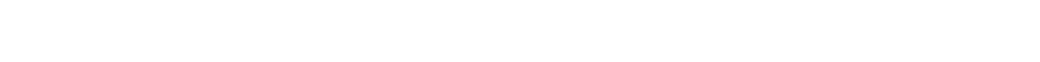

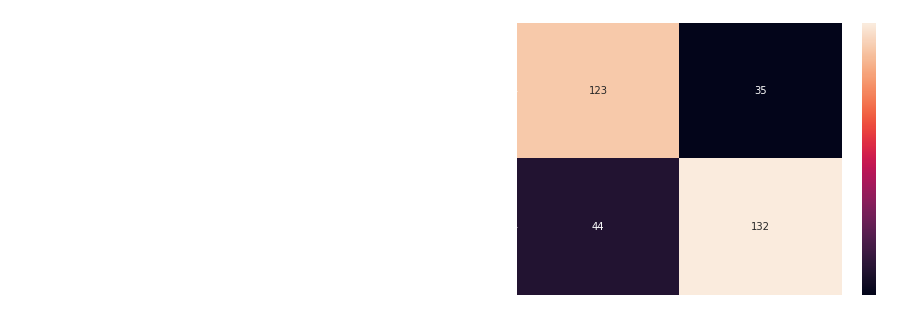

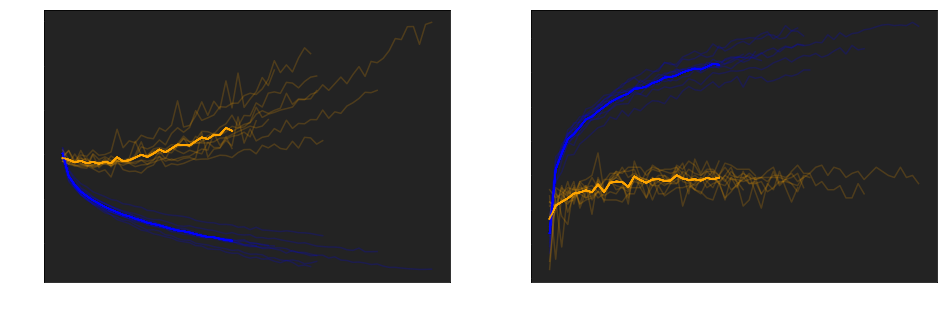

In [9]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('CNN - Retrospective Analysis', loadNetworkHistories('cnn', 'retrospectiveAnalysis-20NDNs'))

### Results

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


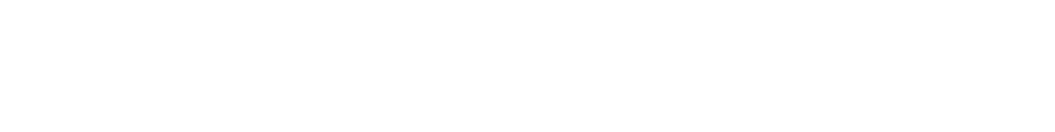

/Users/oliver/Developer/thesis/utils/plotting.py:96: RuntimeWarning: Mean of empty slice.
  return np.array([max(history['val_acc']) for history in histories]).mean(axis=0) * 100


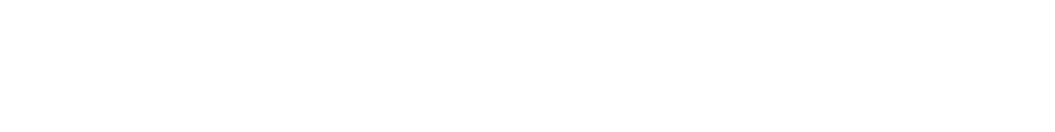

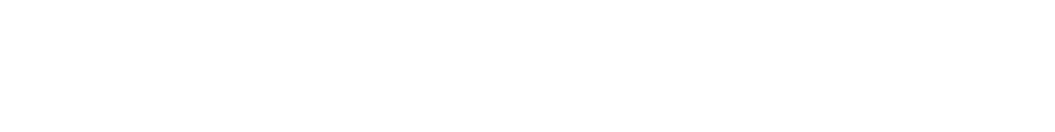

In [10]:
import matplotlib.pyplot as plt
from utils.plotting import getAvgMaxNetworkAccuracy, getAvgClassifierAccuracy, compareModels
from utils.modelHandling import loadNetworkHistories, loadClassifierHistories

compareModels('SVC', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgClassifierAccuracy(loadClassifierHistories('lcf', f'retrospectiveAnalysis-{NDNs}NDNs')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']] + [getAvgClassifierAccuracy(loadClassifierHistories('lcf', 'retrospectiveAnalysis'))])

compareModels('MLP', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('ann', f'retrospectiveAnalysis-{NDNs}NDNs')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']] + [getAvgMaxNetworkAccuracy(loadNetworkHistories('ann', 'retrospectiveAnalysis'))])

compareModels('CNN', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('cnn', f'retrospectiveAnalysis-{NDNs}NDNs')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']] + [getAvgMaxNetworkAccuracy(loadNetworkHistories('cnn', 'retrospectiveAnalysis'))])

## Test 4 - PCA
Question: Does a reduction of the dimensionality of the data through a PCA improve accuracy? <br>
Approach: Train models on data of reduced dimensionality

In [9]:
from utils.dataCompilation import compileVectorsWithReducedDim

compileVectorsWithReducedDim()

1989
	Original dimensions: 200
	Processed dimensions: 179

2019
	Original dimensions: 200
	Processed dimensions: 178



In [1]:
from utils.dataCompilation import compileRetrospectiveAnalysisDataset

compileRetrospectiveAnalysisDataset(reducedDim=True)

5 NDNs
chemical:mesh:d013413#disease:mesh:d016780;existing;not_confirmed;0.8180237412452698; sulfadoxine#Malaria, Vivax

chemical:mesh:d013413#disease:mesh:d016778;existing;not_confirmed;0.8010141253471375; sulfadoxine#Malaria, Falciparum

chemical:mesh:d013413#disease:mesh:c531736;existing;not_confirmed;0.7857060432434082; sulfadoxine#Acute malaria

chemical:mesh:d013413#disease:mesh:d008288;existing;not_confirmed;0.7546558380126953; sulfadoxine#Malaria

chemical:mesh:d013413#disease:mesh:d016779;existing;not_confirmed;0.7256428003311157; sulfadoxine#Malaria, Cerebral

chemical:mesh:d014745#disease:mesh:d020230;predicted;not_confirmed;0.5839463472366333; viloxazine#Serotonin Syndrome

chemical:mesh:d014745#disease:mesh:d009771;predicted;not_confirmed;0.5370084643363953; viloxazine#Obsessive-Compulsive Disorder

chemical:mesh:d014745#disease:mesh:d007319;existing;not_confirmed;0.5351284742355347; viloxazine#Sleep Initiation and Maintenance Disorders

chemical:mesh:d014745#disease:mesh:


chemical:mesh:d014751#disease:mesh:d018365;predicted;confirmed;0.627167284488678; vindesine#Neoplasm, Residual

chemical:mesh:d010394#disease:mesh:d013610;existing;not_confirmed;0.4912227392196655; penbutolol#Tachycardia

chemical:mesh:d010394#disease:mesh:d060050;existing;not_confirmed;0.43555426597595215; penbutolol#Angina, Stable

chemical:mesh:d010394#disease:mesh:d004244;existing;not_confirmed;0.4307512044906616; penbutolol#Dizziness

chemical:mesh:d010394#disease:mesh:d001919;existing;not_confirmed;0.4281550943851471; penbutolol#Bradycardia

chemical:mesh:d010394#disease:mesh:d018879;predicted;not_confirmed;0.4014819860458374; penbutolol#Ventricular Premature Complexes

chemical:mesh:d013420#disease:mesh:d016715;existing;not_confirmed;0.6046812534332275; sulfamethoxazole#Proteus Syndrome

chemical:mesh:d013420#disease:mesh:d010585;existing;not_confirmed;0.5889490246772766; sulfamethoxazole#Phagocyte Bactericidal Dysfunction

chemical:mesh:d013420#disease:mesh:d014552;existing;no


chemical:mesh:d013431#disease:mesh:c535787;predicted;not_confirmed;0.46217918395996094; protamine sulfate#Spondyloepiphyseal dysplasia tarda, Toledo type

chemical:mesh:d013431#disease:mesh:c536201;existing;not_confirmed;0.4492914080619812; protamine sulfate#Ehlers-Danlos syndrome, progeroid form

chemical:mesh:d013431#disease:mesh:d052517;predicted;not_confirmed;0.41278496384620667; protamine sulfate#Multiple Sulfatase Deficiency Disease

chemical:mesh:d013431#disease:mesh:d009087;predicted;not_confirmed;0.38724592328071594; protamine sulfate#Mucopolysaccharidosis VI

chemical:mesh:d001418#disease:mesh:c562651;predicted;not_confirmed;0.5386785864830017; baclofen#Ethanolaminosis

chemical:mesh:d001418#disease:mesh:d002375;existing;not_confirmed;0.5290490388870239; baclofen#Catalepsy

chemical:mesh:d001418#disease:mesh:d012640;existing;not_confirmed;0.49945366382598877; baclofen#Seizures

chemical:mesh:d001418#disease:mesh:c535407;predicted;not_confirmed;0.4866115152835846; baclofen#Ga


chemical:mesh:d014303#disease:mesh:c538397;existing;not_confirmed;0.5023072957992554; trinitrotoluene#Nemaline myopathy 5

chemical:mesh:d014303#disease:mesh:c564253;predicted;not_confirmed;0.48387959599494934; trinitrotoluene#Myopathy, Myosin Storage

chemical:mesh:d014303#disease:mesh:c580316;predicted;not_confirmed;0.3557920455932617; trinitrotoluene#Myofibrillar Myopathy

chemical:mesh:d014303#disease:mesh:d006362;predicted;not_confirmed;0.3463413417339325; trinitrotoluene#Heavy Chain Disease

chemical:mesh:d014303#disease:mesh:c538351;predicted;not_confirmed;0.3400171995162964; trinitrotoluene#Nemaline myopathy 4

chemical:mesh:d013459#disease:mesh:d056151;predicted;not_confirmed;0.4615108370780945; sulfur hexafluoride#Airway Remodeling

chemical:mesh:d013459#disease:mesh:d001469;predicted;not_confirmed;0.4305969178676605; sulfur hexafluoride#Barotrauma

chemical:mesh:d013459#disease:mesh:d007040;predicted;not_confirmed;0.41287288069725037; sulfur hexafluoride#Hypoventilation

ch


chemical:mesh:d017830#disease:mesh:c562719;existing;not_confirmed;0.44611141085624695; octylphenoxy polyethoxyethanol#Tn Syndrome

chemical:mesh:d017830#disease:mesh:c535752;predicted;not_confirmed;0.3780916929244995; octylphenoxy polyethoxyethanol#Congenital disorder of glycosylation type 2A

chemical:mesh:d017830#disease:mesh:c565538;predicted;not_confirmed;0.3647995591163635; octylphenoxy polyethoxyethanol#Glycoprotein Storage Disease

chemical:mesh:d017830#disease:mesh:d021183;predicted;not_confirmed;0.36425846815109253; octylphenoxy polyethoxyethanol#Peanut Hypersensitivity

chemical:mesh:d000526#disease:mesh:c537014;existing;not_confirmed;0.4060952365398407; alprenolol#Infantile polyarteritis

chemical:mesh:d000526#disease:mesh:c567134;predicted;not_confirmed;0.37745484709739685; alprenolol#Deafness, Autosomal Recessive 1A

chemical:mesh:d000526#disease:mesh:d044542;predicted;not_confirmed;0.3598361313343048; alprenolol#LEOPARD Syndrome

chemical:mesh:d000526#disease:mesh:d01361


chemical:mesh:d012967#disease:mesh:c565538;existing;not_confirmed;0.4668882489204407; sodium lauryl sulfate#Glycoprotein Storage Disease

chemical:mesh:d012967#disease:mesh:d006316;existing;not_confirmed;0.43566572666168213; sodium lauryl sulfate#Hearing Loss, High-Frequency

chemical:mesh:d012967#disease:mesh:d021183;existing;not_confirmed;0.4269215166568756; sodium lauryl sulfate#Peanut Hypersensitivity

chemical:mesh:d012967#disease:mesh:c567116;existing;not_confirmed;0.3835436999797821; sodium lauryl sulfate#Kininogen Deficiency, High Molecular Weight and Low Molecular Weight

chemical:mesh:c080436#disease:mesh:d016780;existing;not_confirmed;0.6202211380004883; sitamaquine#Malaria, Vivax

chemical:mesh:c080436#disease:mesh:d008289;predicted;not_confirmed;0.5621412992477417; sitamaquine#Malaria, Avian

chemical:mesh:c080436#disease:mesh:c531736;predicted;not_confirmed;0.5464472770690918; sitamaquine#Acute malaria

chemical:mesh:c080436#disease:mesh:d016778;existing;not_confirmed;0.


chemical:mesh:c084820#disease:mesh:c535672;predicted;not_confirmed;0.44415634870529175; ethopropazine#Acute cholinergic dysautonomia

chemical:mesh:c084820#disease:mesh:c537417;predicted;not_confirmed;0.44124943017959595; ethopropazine#Butyrylcholinesterase deficiency

chemical:mesh:c084820#disease:mesh:d020941;predicted;not_confirmed;0.37524980306625366; ethopropazine#Myasthenia Gravis, Neonatal

chemical:mesh:c084820#disease:mesh:d017109;predicted;not_confirmed;0.37148532271385193; ethopropazine#Akathisia, Drug-Induced

chemical:mesh:c084825#disease:mesh:d002375;predicted;not_confirmed;0.4923913776874542; thioproperazine#Catalepsy

chemical:mesh:c084825#disease:mesh:c567730;predicted;not_confirmed;0.48271915316581726; thioproperazine#Parkinsonism-Dystonia, Infantile

chemical:mesh:c084825#disease:mesh:d004409;existing;not_confirmed;0.3957938253879547; thioproperazine#Dyskinesia, Drug-Induced

chemical:mesh:c084825#disease:mesh:d009459;predicted;not_confirmed;0.39038026332855225; thi


chemical:mesh:c001652#disease:mesh:d018827;predicted;not_confirmed;0.4215308129787445; omacetaxine mepesuccinate#Carcinoma, Lewis Lung

chemical:mesh:c001652#disease:mesh:d012510;predicted;not_confirmed;0.37966597080230713; omacetaxine mepesuccinate#Sarcoma 180

chemical:mesh:c001652#disease:mesh:c531667;predicted;not_confirmed;0.36567452549934387; omacetaxine mepesuccinate#5 alpha Fluorouracil toxicity

chemical:mesh:d003647#disease:mesh:c565959;existing;not_confirmed;0.4911783039569855; debrisoquin#Amobarbital, Deficient N-Hydroxylation of

chemical:mesh:d003647#disease:mesh:c565044;existing;not_confirmed;0.44926631450653076; debrisoquin#Diphenylhydantoin, Defect in Hydroxylation of

chemical:mesh:d003647#disease:mesh:c565127;predicted;not_confirmed;0.4215537905693054; debrisoquin#Phenacetin O-Deethylase, Deficiency of

chemical:mesh:d003647#disease:mesh:c537607;predicted;not_confirmed;0.40602704882621765; debrisoquin#Rhizomelic chondrodysplasia punctata, type 2

chemical:mesh:d0036

KeyboardInterrupt: 

### LCF

In [ ]:
from utils.dataLoading import loadRetrospectiveAnalysisData
from utils.training import trainLCF

for NDNs in [5, 10, 20, 50, 100, 'Adaptive']:
    print(f'{NDNs} NDNs')
    X_pos_train, X_neg_train, X_pos_test, X_neg_test = loadRetrospectiveAnalysisData(NDNs, dataType='concat-reducedDim')
    
    trainLCF(X_pos_train, X_neg_train, f'retrospectiveAnalysis-{NDNs}NDNs', dataType='concat-reducedDim', X_pos_test=X_pos_test, X_neg_test=X_neg_test)

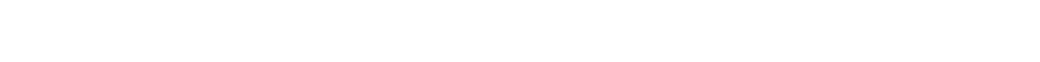

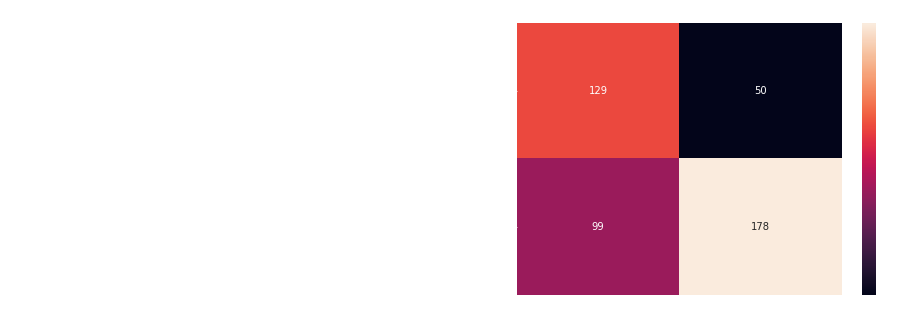

In [3]:
from utils.plotting import analyzeClassifier
from utils.modelHandling import loadClassifierHistories

analyzeClassifier('LCF - Predicted DDAs', loadClassifierHistories('lcf', 'retrospectiveAnalysis-AdaptiveNDNs', dataType='concat-reducedDim'))

### ANN

In [ ]:
from utils.dataLoading import loadRetrospectiveAnalysisData
from utils.training import trainANN

for NDNs in [5, 10, 20, 50, 100, 'Adaptive']:
    print(f'{NDNs} NDNs')
    X_pos_train, X_neg_train, X_pos_test, X_neg_test = loadRetrospectiveAnalysisData(NDNs, dataType='concat-reducedDim')
    
    trainANN(X_pos_train, X_neg_train, f'retrospectiveAnalysis-{NDNs}NDNs', dataType='concat-reducedDim', X_pos_test=X_pos_test, X_neg_test=X_neg_test)

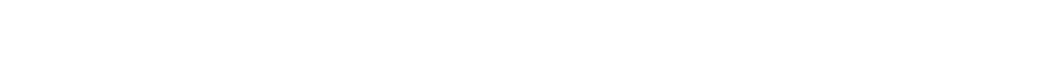

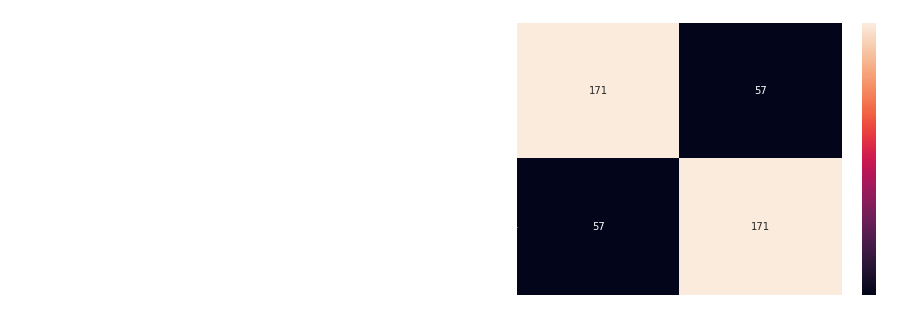

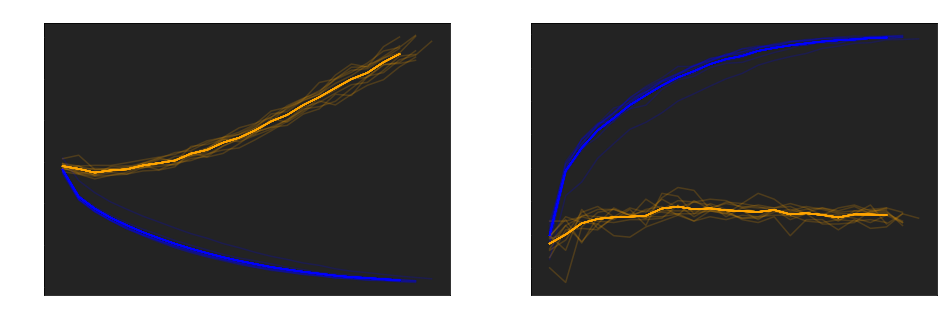

In [4]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('ANN - Retrospective Analysis', loadNetworkHistories('ann', 'retrospectiveAnalysis-AdaptiveNDNs', dataType='concat-reducedDim'))

### CNN

In [ ]:
from utils.dataLoading import loadRetrospectiveAnalysisData
from utils.training import trainCNN

for NDNs in [5, 10, 20, 50, 100, 'Adaptive']:
    print(f'{NDNs} NDNs')
    X_pos_train, X_neg_train, X_pos_test, X_neg_test = loadRetrospectiveAnalysisData(NDNs, dataType='concat-reducedDim')
    
    trainCNN(X_pos_train, X_neg_train, f'retrospectiveAnalysis-{NDNs}NDNs', dataType='concat-reducedDim', X_pos_test=X_pos_test, X_neg_test=X_neg_test)

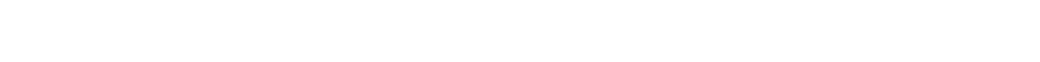

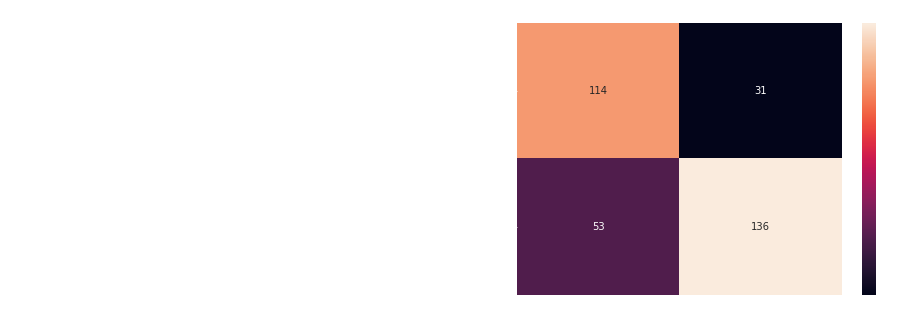

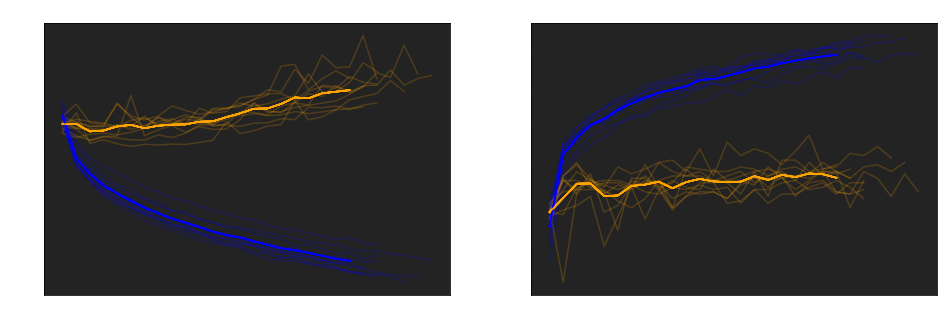

In [9]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('CNN - Retrospective Analysis', loadNetworkHistories('cnn', 'retrospectiveAnalysis-AdaptiveNDNs', dataType='concat-reducedDim'))

### Results

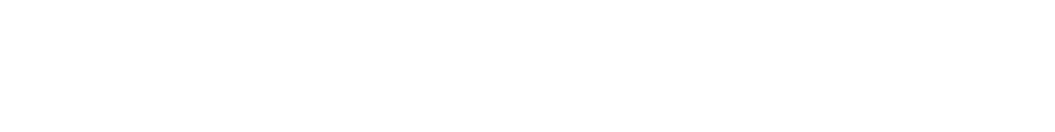

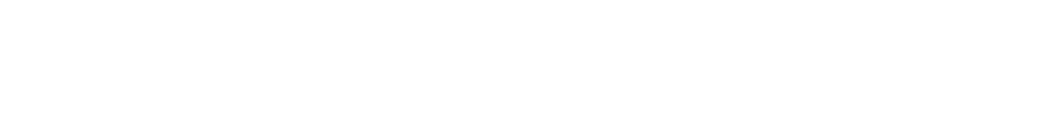

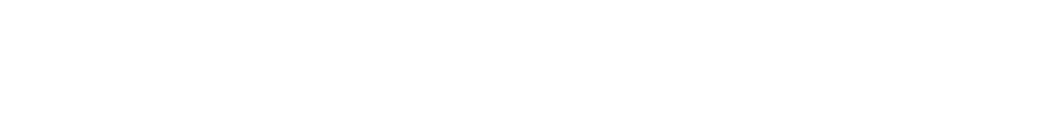

In [7]:
import matplotlib.pyplot as plt
from utils.plotting import getAvgMaxNetworkAccuracy, getAvgClassifierAccuracy, compareModels
from utils.modelHandling import loadNetworkHistories, loadClassifierHistories

compareModels('LCF', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgClassifierAccuracy(loadClassifierHistories('lcf', f'retrospectiveAnalysis-{NDNs}NDNs', dataType='concat-reducedDim')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']])

compareModels('ANN', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('ann', f'retrospectiveAnalysis-{NDNs}NDNs', dataType='concat-reducedDim')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']])

compareModels('CNN', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('cnn', f'retrospectiveAnalysis-{NDNs}NDNs', dataType='concat-reducedDim')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']])

## Test 5 - Semantics
Question: Can we improve the accuracy through adding the full semantics to our model <br>
Approach: Encode the full trees and add them to our data

In [1]:
from utils.dataCompilation import compileSemanticVectors

compileSemanticVectors()

Num chars: 1063
47843 MeSH disease Vectors
10264 MeSH drug Vectors
3259 ATC Vectors


In [1]:
from utils.dataCompilation import compileRetrospectiveAnalysisDatasetWithSemantics

compileRetrospectiveAnalysisDatasetWithSemantics()`

5 NDNs
	test
		267 marker
		238 therapeutic
	train
		3292 marker
		8798 therapeutic
10 NDNs
	test
		678 marker
		593 therapeutic
	train
		5763 marker
		13983 therapeutic
20 NDNs
	test
		1112 marker
		1433 therapeutic
	train
		9707 marker
		21649 therapeutic
50 NDNs
	test
		2729 marker
		3261 therapeutic
	train
		19118 marker
		36059 therapeutic
100 NDNs
	test
		3223 marker
		2179 therapeutic
	train
		32217 marker
		54106 therapeutic
Adaptive NDNs
	test
		1803 marker
		2354 therapeutic
	train
		12504 marker
		24674 therapeutic


### Hybrid ANN

In [ ]:
from utils.training import trainHybridANN

batchSizes = {
    5: 64,
    10: 128,
    20: 256,
    50: 512,
    100: 1024,
    'Adaptive': 256
}

for NDNs in [5, 10, 20, 50, 100, 'Adaptive']:
    print(f'{NDNs} NDNs')
    
    trainHybridANN(f'retrospectiveAnalysisWithSemantics-{NDNs}NDNs', NDNs, 'full', lr=5e-5, batchSize=batchSizes[NDNs])

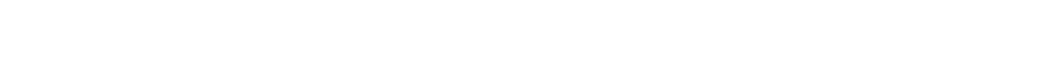

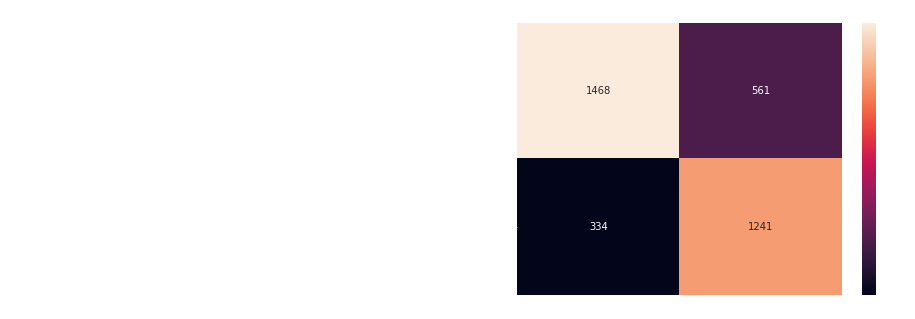

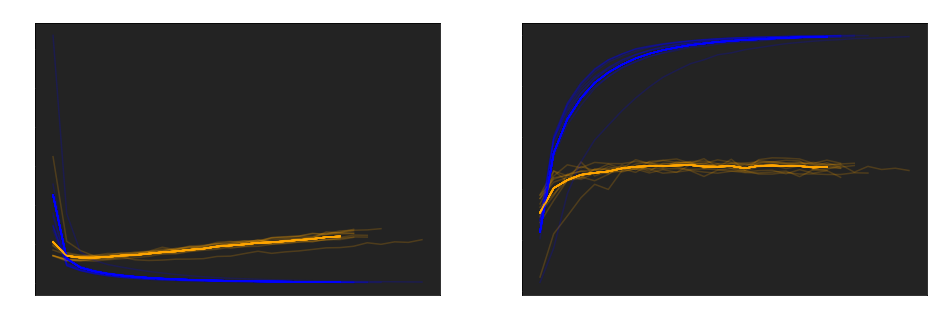

In [17]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('Hybrid ANN - Retrospective Analysis With Full Semantics', loadNetworkHistories('hybridANN', \
                                                                            'retrospectiveAnalysisWithSemantics-AdaptiveNDNs', 'full'))

### Hybrid CNN

In [ ]:
from utils.training import trainHybridCNN

batchSizes = {
    5: 64,
    10: 128,
    20: 256,
    50: 512,
    100: 1024,
    'Adaptive': 256
}

for NDNs in [5, 10, 50, 100, 'Adaptive']:
    print(f'{NDNs} NDNs')
    
    trainHybridCNN(f'retrospectiveAnalysisWithSemantics-{NDNs}NDNs', NDNs, 'full', lr=5e-5, batchSize=batchSizes[NDNs])

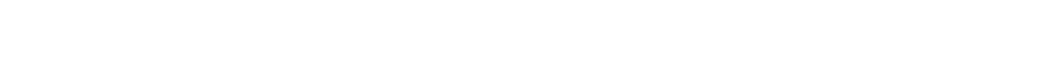

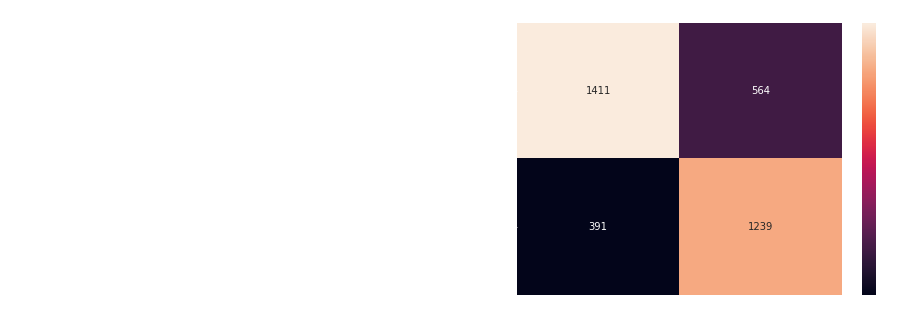

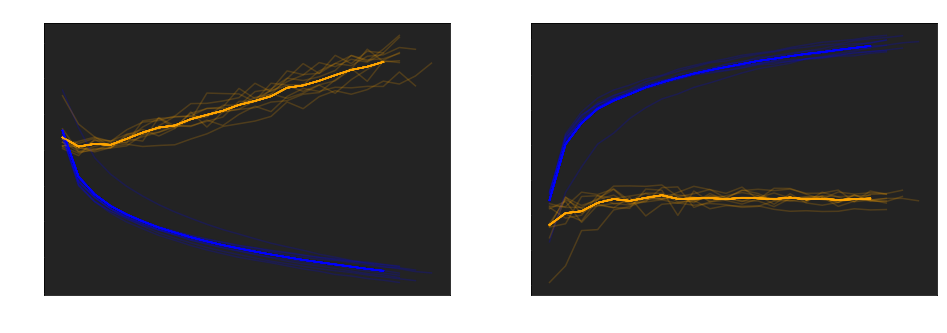

In [6]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('Hybrid CNN - Retrospective Analysis With Full Semantics', loadNetworkHistories('hybridCNN', \
                                                                            'retrospectiveAnalysisWithSemantics-AdaptiveNDNs', 'full'))

### Hybrid

In [ ]:
from utils.training import trainHybrid

batchSizes = {
    5: 64,
    10: 128,
    20: 256,
    50: 512,
    100: 1024,
    'Adaptive': 256
}

for NDNs in [5, 10, 50, 100]:
    print(f'{NDNs} NDNs')
    
    trainHybrid(f'retrospectiveAnalysisWithSemantics-{NDNs}NDNs', NDNs, 'full', lr=1e-5, batchSize=batchSizes[NDNs])

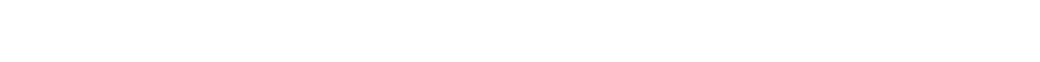

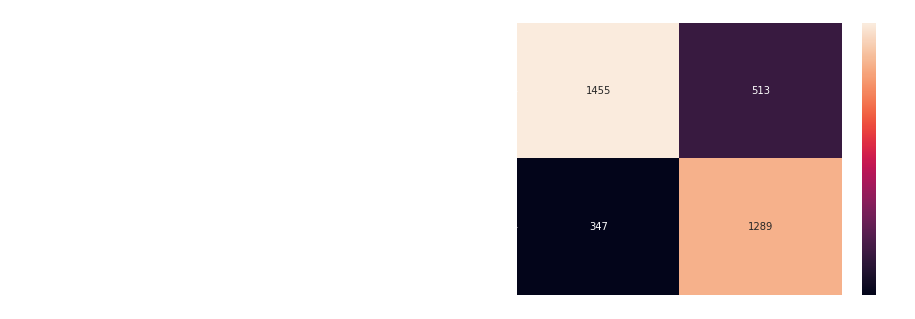

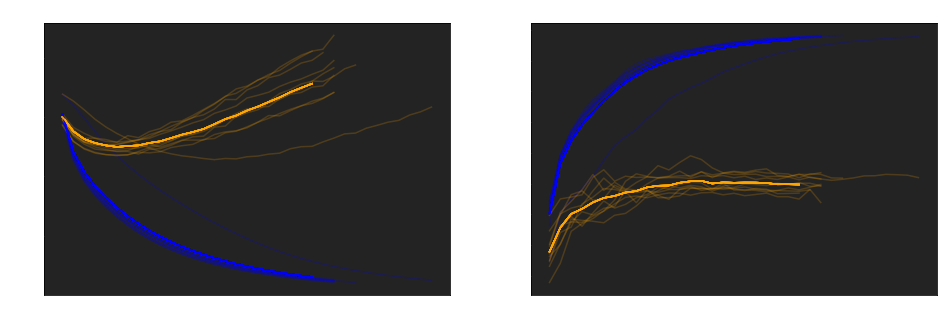

In [24]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('Hybrid - Retrospective Analysis With Full Semantics', loadNetworkHistories('hybrid', \
                                                                            'retrospectiveAnalysisWithSemantics-AdaptiveNDNs', 'full'))

### Analyze Results

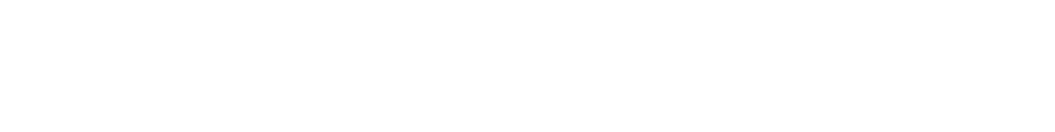

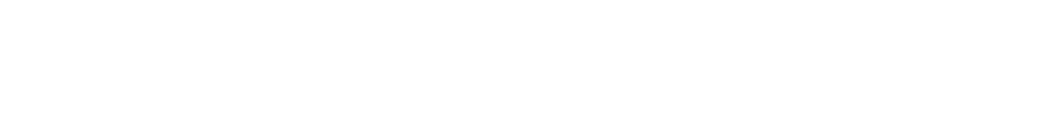

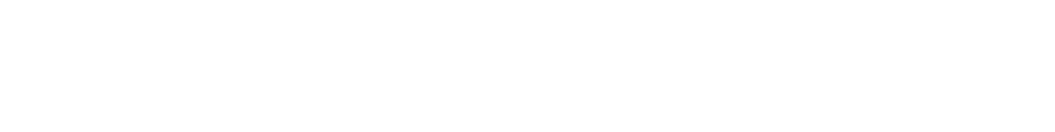

In [5]:
from utils.plotting import getAvgMaxNetworkAccuracy, compareModels
from utils.modelHandling import loadNetworkHistories

compareModels(f'Hybrid ANN', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('hybridANN', f'retrospectiveAnalysisWithSemantics-{NDNs}NDNs', 'full')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']])

compareModels(f'Hybrid CNN', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('hybridCNN', f'retrospectiveAnalysisWithSemantics-{NDNs}NDNs', 'full')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']])

compareModels(f'Hybrid', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('hybrid', f'retrospectiveAnalysisWithSemantics-{NDNs}NDNs', 'full')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']])

## Test 6 - Expert Analysis
Question: How good is our model at actually predicting the type of DDAs predicted today? <br>
Approach: Expert Analysis

In [ ]:
from utils.dataCompilation import compilePredictedDDAsWithSemantics

compilePredictedDDAsWithSemantics()

5 NDNs
	2466 marker associations
	9750 therapeutic associations
10 NDNs
	5036 marker associations
	17096 therapeutic associations
20 NDNs
	9270 marker associations
	27266 therapeutic associations
50 NDNs
	18190 marker associations
	43292 therapeutic associations
100 NDNs


### ANN

In [ ]:
from utils.dataLoading import loadPredictedDDAs
from utils.training import trainANN

for NDNs in ['5', '10', '20', '50', '100', 'Adaptive']:
    print(f'\n{NDNs} NDNs')
    X_pos, X_neg = loadPredictedDDAs(NDNs)
    
    trainANN(X_pos, X_neg, f'predictedDDAs-{NDNs}NDNs', 'full')

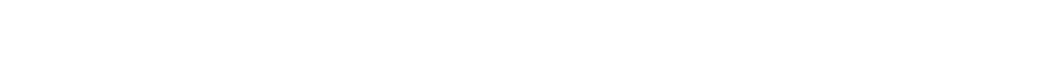

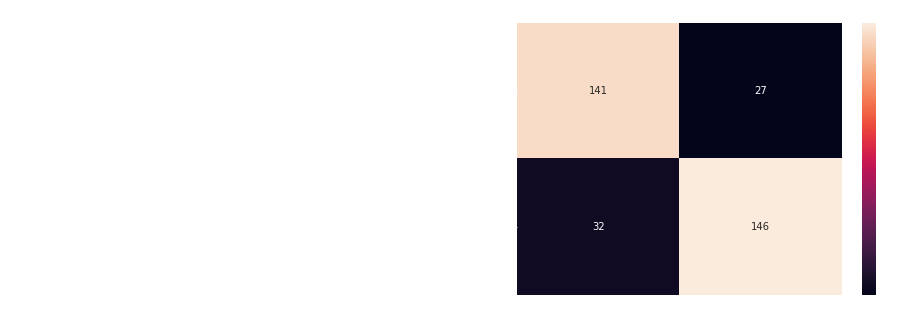

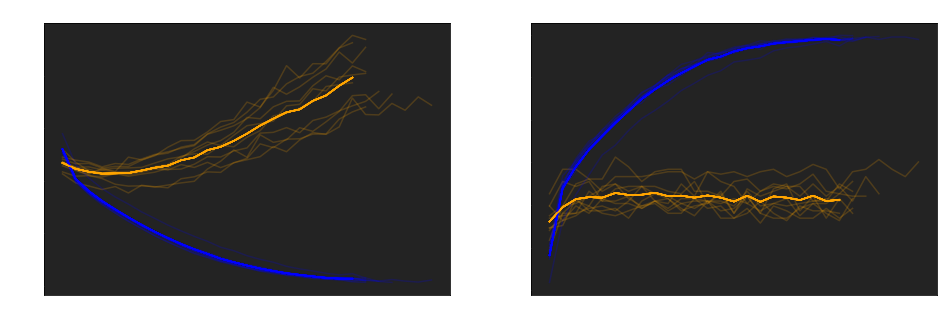

In [15]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('ANN - Predicted DDAs', loadNetworkHistories('ann', 'predictedDDAs-AdaptiveNDNs', 'full'))

### CNN

In [ ]:
from utils.dataLoading import loadPredictedDDAs
from utils.training import trainCNN

for NDNs in ['5', '10', '20', '50', '100', 'Adaptive']:
    print(f'\n{NDNs} NDNs')
    X_pos, X_neg = loadPredictedDDAs(NDNs)
    
    trainCNN(X_pos, X_neg, f'predictedDDAs-{NDNs}NDNs', 'full')

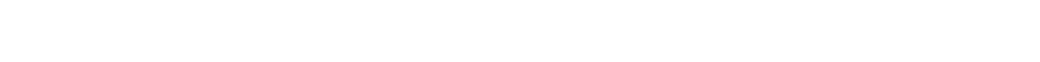

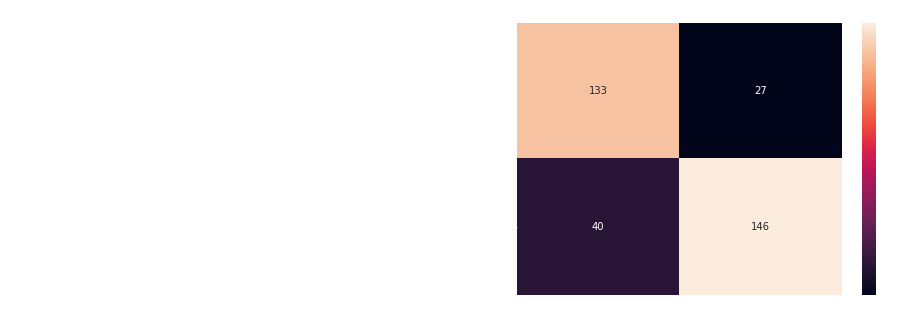

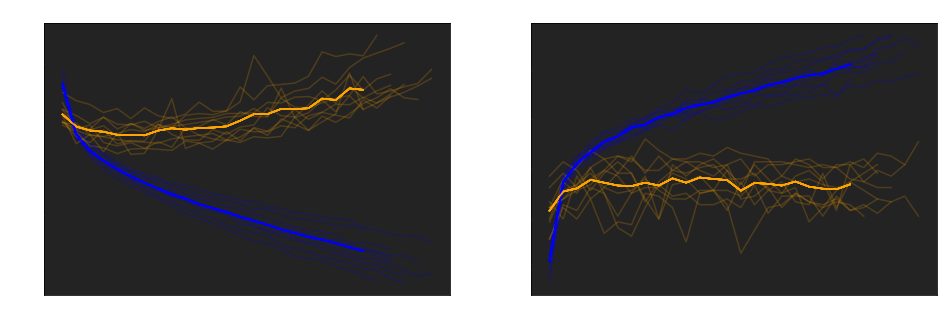

In [10]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('CNN - Predicted DDAs', loadNetworkHistories('cnn', 'predictedDDAs-AdaptiveNDNs', 'full'))

### Hybrid ANN

In [ ]:
from utils.training import trainHybridANN

batchSizes = {
    5: 64,
    10: 128,
    20: 256,
    50: 512,
    100: 1024,
    'Adaptive': 256
}

for NDNs in [5, 10, 20, 50, 100, 'Adaptive']:
    print(f'{NDNs} NDNs')
    
    trainHybridANN(f'predictedDDAsWithSemantics-{NDNs}NDNs', NDNs, 'full', lr=5e-5, batchSize=batchSizes[NDNs])

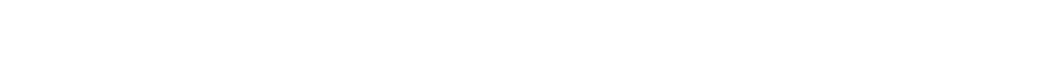

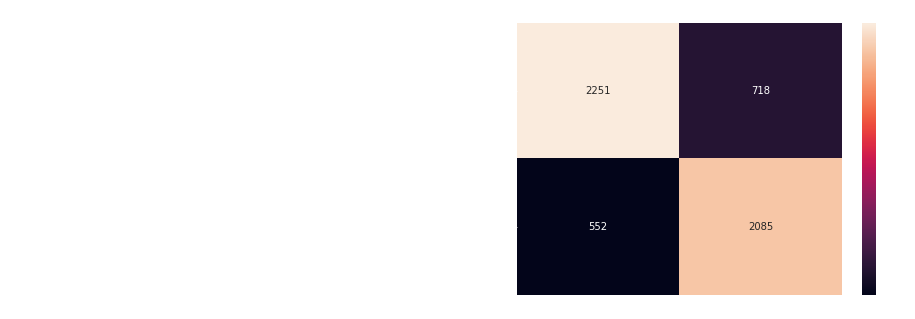

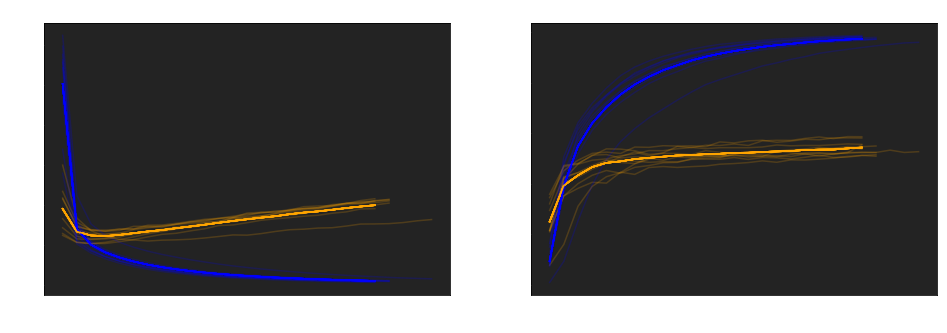

In [14]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('Hybrid ANN', loadNetworkHistories('hybridANN', 'predictedDDAsWithSemantics-100NDNs', 'full'))

### Hybrid CNN

In [ ]:
from utils.training import trainHybridCNN

batchSizes = {
    5: 64,
    10: 128,
    20: 256,
    50: 512,
    100: 1024,
    'Adaptive': 256
}

for NDNs in [5, 10, 20, 50, 100, 'Adaptive']:
    print(f'{NDNs} NDNs')
    
    trainHybridCNN(f'predictedDDAsWithSemantics-{NDNs}NDNs', NDNs, 'full', lr=5e-5, batchSize=batchSizes[NDNs])

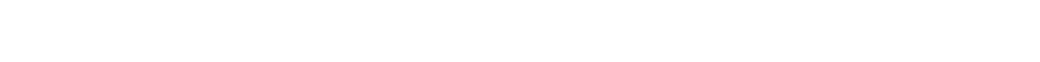

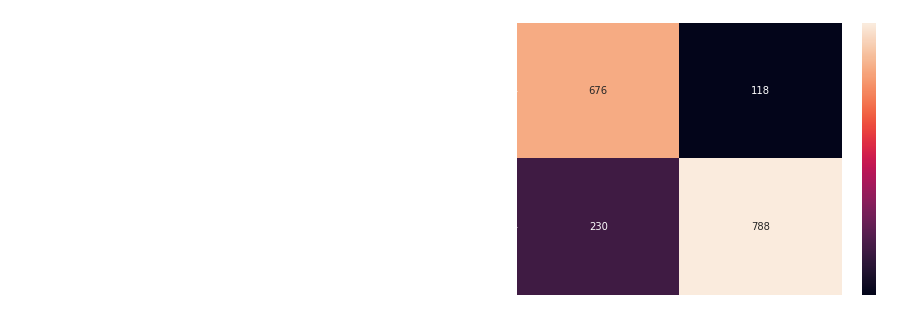

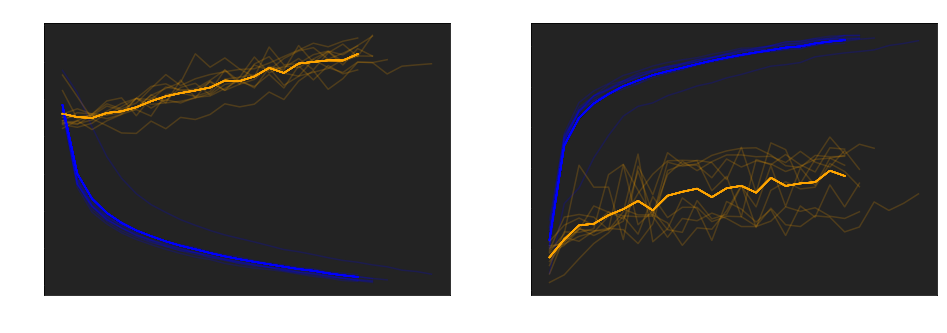

In [33]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('Hybrid CNN', loadNetworkHistories('hybridCNN', 'predictedDDAsWithSemantics-20NDNs', 'full'))

### Hybrid

In [ ]:
from utils.training import trainHybrid

batchSizes = {
    5: 64,
    10: 128,
    20: 256,
    50: 512,
    100: 1024,
    'Adaptive': 256
}

for NDNs in [5, 10, 20, 50, 100, 'Adaptive']:
    print(f'{NDNs} NDNs')
    
    trainHybrid(f'predictedDDAsWithSemantics-{NDNs}NDNs', NDNs, 'full', lr=1e-5, batchSize=batchSizes[NDNs])

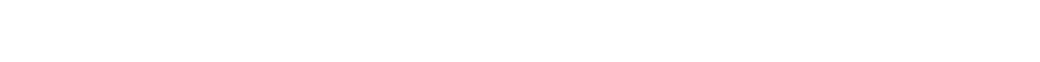

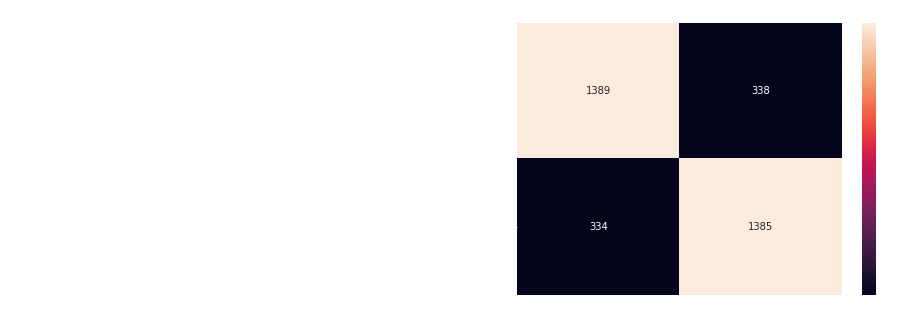

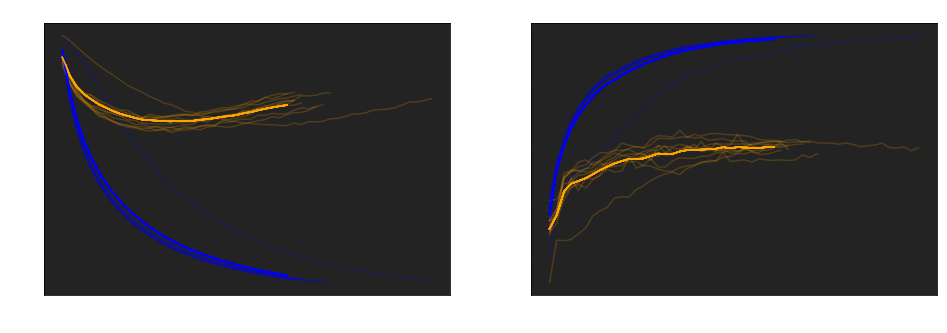

In [34]:
from utils.plotting import analyzeNetwork
from utils.modelHandling import loadNetworkHistories

analyzeNetwork('Hybrid', loadNetworkHistories('hybrid', 'predictedDDAsWithSemantics-50NDNs', 'full'))

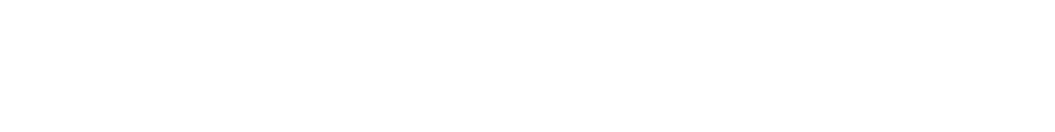

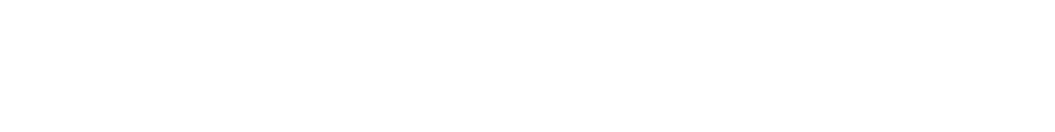

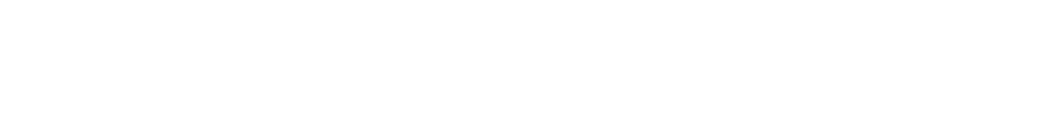

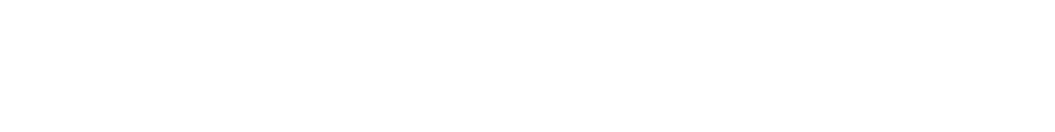

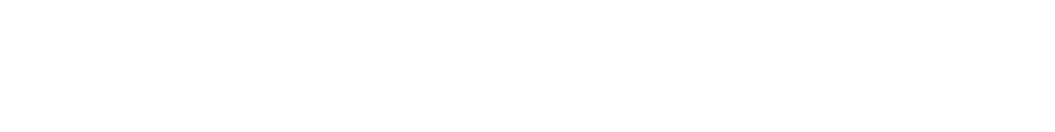

In [25]:
from utils.plotting import getAvgMaxNetworkAccuracy, compareModels
from utils.modelHandling import loadNetworkHistories

compareModels(f'ANN', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('ann', f'predictedDDAs-{NDNs}NDNs', 'full')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']])

compareModels(f'CNN', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('cnn', f'predictedDDAs-{NDNs}NDNs', 'full')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']])

compareModels(f'Hybrid ANN', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('hybridANN', f'predictedDDAsWithSemantics-{NDNs}NDNs', 'full')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']])

compareModels(f'Hybrid CNN', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('hybridCNN', f'predictedDDAsWithSemantics-{NDNs}NDNs', 'full')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']])

compareModels(f'Hybrid', 'NDNs', [5, 10, 20, 50, 100, 'Adaptive'], 
             [getAvgMaxNetworkAccuracy(loadNetworkHistories('hybrid', f'predictedDDAsWithSemantics-{NDNs}NDNs', 'full')) 
              for NDNs in [5, 10, 20, 50, 100, 'Adaptive']])